In [ ]:
import pandas_profiling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [3]:
housing_data = pd.read_csv("C:\\Users\\my\\Downloads\\DC\\DC_Properties.csv")

C:\Users\my\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#train_dataset = (train_dataset - train_dataset.mean()) / (train_dataset.max() - train_dataset.min())

In [6]:
#housing_data.head()

In [7]:
housing_data.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
# Creating copy of the dataset and making changes to this copy

housing_data_copy = housing_data.copy()

# Generating profiling report

In [ ]:
profile = pandas_profiling.ProfileReport(housing_data)

#profile.to_file(outputfile ="C:\\Users\\keerti.chouhan\\Desktop\\housing.html")

#About the data from profiling report

#Number of variables	48
#Number of observations	158957
#Total Missing (%)	15.7%

# Variable types :

#Numeric	22
#Categorical	23
#Rejected	3 (X,Y, Num_units shall be rejected as they are highly correlated with longitude,latitude and kitchen respectevely)


# Dropping irrelevant columns 

In [5]:
housing_data_copy = housing_data_copy.drop("Unnamed: 0", axis = 1)

In [6]:
#Removing unwanted columns

housing_data_copy = housing_data_copy.drop(["X","Y","NUM_UNITS","CITY","STATE"], axis = 1)


In [7]:
#droping stories as stories and style are giving similar information

housing_data_copy = housing_data_copy.drop(["STORIES"], axis = 1)

In [8]:
# GBA And Living gba are both gross building area in square feet
# As the pattern shows, gba values which are missing are present in living gba and vice versa
# So copying and deleting one of the column 

#housing_data_copy.loc[housing_data_copy.GBA.isnull(),]
housing_data_copy.loc[106696:158956,"GBA"] = housing_data_copy.loc[106696:158956,"LIVING_GBA"]

In [9]:
#Dropping irrelevant variables like census block, assessment subneighborhood, national grid and full address

# Reason: Full address has high cardinality, i.e values are distinct, futher we have latitude and longitude information which is good to use
# National grid : we have latitude and longitude information which is good to use
# Census block doesn't make any sense
# assessment subneighborhood: has high cardinality


housing_data_copy = housing_data_copy.drop(["ASSESSMENT_SUBNBHD","CENSUS_BLOCK","FULLADDRESS","NATIONALGRID"], axis = 1)


In [10]:
#Dropping Living gba 
housing_data_copy = housing_data_copy.drop("LIVING_GBA", axis = 1)

#Dropping complex no. as around 68% missing values are there

housing_data_copy = housing_data_copy.drop("CMPLX_NUM", axis = 1)


In [11]:
#Dropping year of re model as around 50% of the values are missing

housing_data_copy = housing_data_copy.drop("YR_RMDL", axis = 1)

In [12]:
housing_data_copy.index = housing_data_copy.index.rename('Index')

In [13]:
housing_data_copy.head(5)

#35 columns are selected

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,EYB,SALEDATE,PRICE,...,GIS_LAST_MOD_DTTM,SOURCE,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE,QUADRANT
Index,,,,,,,,,,,,,,,,,,,,,
0,4,0,Warm Cool,Y,8,4,1910.0,1972,2003-11-25 00:00:00,1095000.0,...,2018-07-22 18:01:43,Residential,20009.0,38.914680,-77.040832,Old City 2,4201.0,Ward 2,152,NW
1,3,1,Warm Cool,Y,11,5,1898.0,1972,2000-08-17 00:00:00,NaN,...,2018-07-22 18:01:43,Residential,20009.0,38.914683,-77.040764,Old City 2,4201.0,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,9,5,1910.0,1984,2016-06-21 00:00:00,2100000.0,...,2018-07-22 18:01:43,Residential,20009.0,38.914684,-77.040678,Old City 2,4201.0,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,8,5,1900.0,1984,2006-07-12 00:00:00,1602000.0,...,2018-07-22 18:01:43,Residential,20009.0,38.914683,-77.040629,Old City 2,4201.0,Ward 2,152,NW
4,2,1,Warm Cool,Y,11,3,1913.0,1985,NaN,NaN,...,2018-07-22 18:01:43,Residential,20009.0,38.914383,-77.039361,Old City 2,4201.0,Ward 2,152,NW


# Visualizing data wrt Price

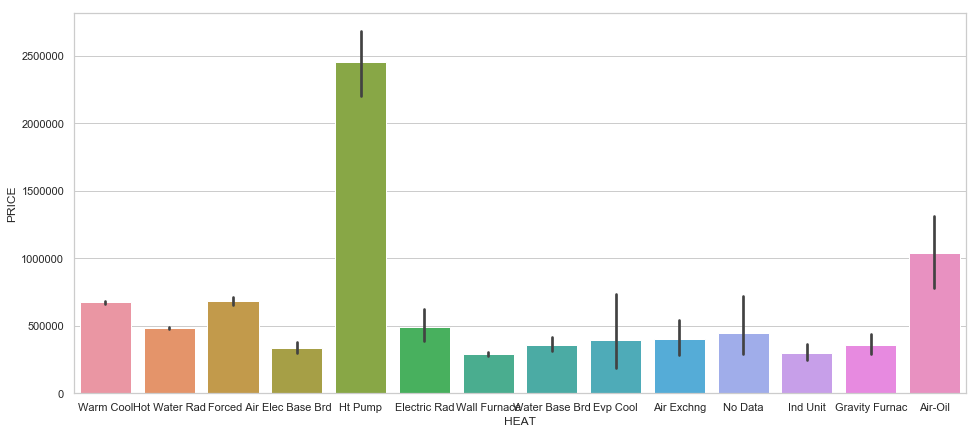

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="HEAT", y="PRICE", data= housing_data_copy)
plt.show()

#Graph shows that houses with ht pump are priced high

In [20]:

housing_object = housing_data_copy.select_dtypes(include=['O'])
housing_object

,HEAT,AC,SALEDATE,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,GIS_LAST_MOD_DTTM,SOURCE,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT
Index,,,,,,,,,,,,,,,,,
0,Warm Cool,Y,2003-11-25 00:00:00,Q,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
1,Warm Cool,Y,2000-08-17 00:00:00,U,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
2,Hot Water Rad,Y,2016-06-21 00:00:00,Q,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
3,Hot Water Rad,Y,2006-07-12 00:00:00,Q,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
4,Warm Cool,Y,NaN,U,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
5,Hot Water Rad,Y,2010-02-26 00:00:00,Q,4 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
6,Warm Cool,Y,2011-05-02 00:00:00,U,2 Story,Row Inside,Above Average,Average,Common Brick,Metal- Sms,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
7,Hot Water Rad,Y,2011-09-29 00:00:00,Q,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
8,Warm Cool,Y,2018-05-03 00:00:00,Q,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW


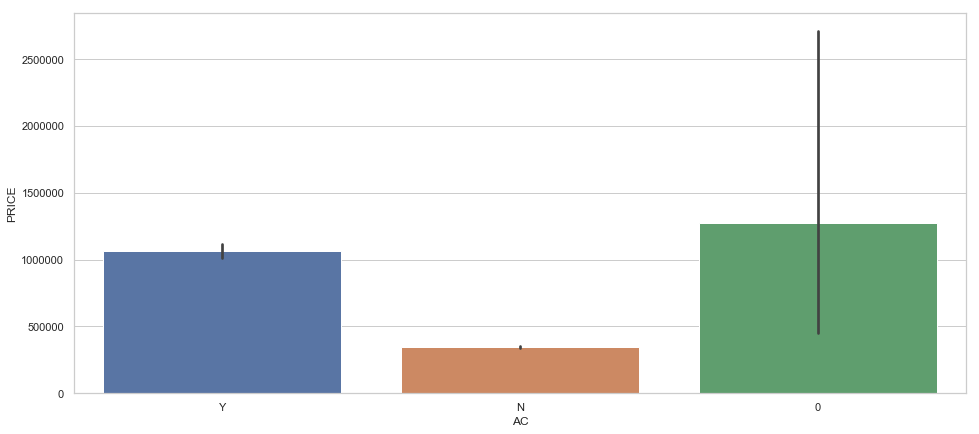

In [70]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="AC", y="PRICE", data= housing_data_copy)
plt.show()

# Graph shows 0 AC can be merged to no AC
# AC houses are priced more

In [14]:
housing_data_copy["AC"] = housing_data_copy["AC"].replace(to_replace = "0" , value = "N")

In [71]:
housing_data_copy.AC.value_counts()

Y    114620
N     44272
0        65
Name: AC, dtype: int64

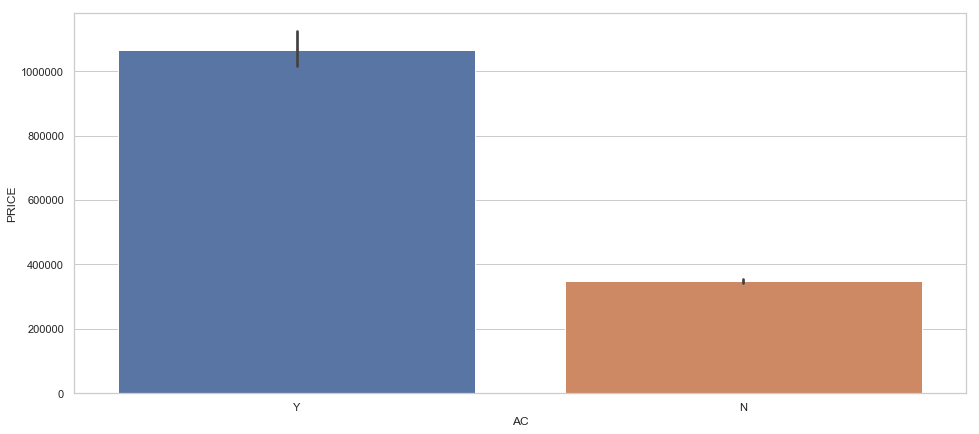

In [73]:

sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="AC", y="PRICE", data= housing_data_copy)
plt.show()

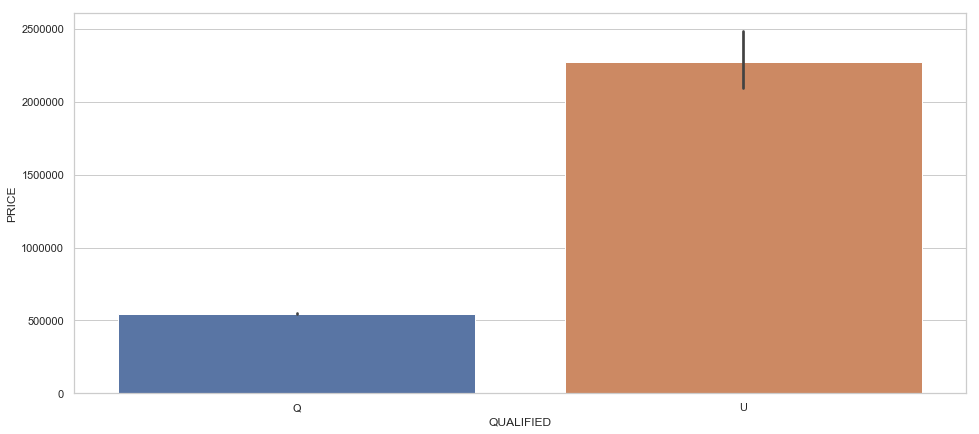

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="QUALIFIED", y="PRICE", data= housing_data_copy)
plt.show()

# Price of unqualified house is more

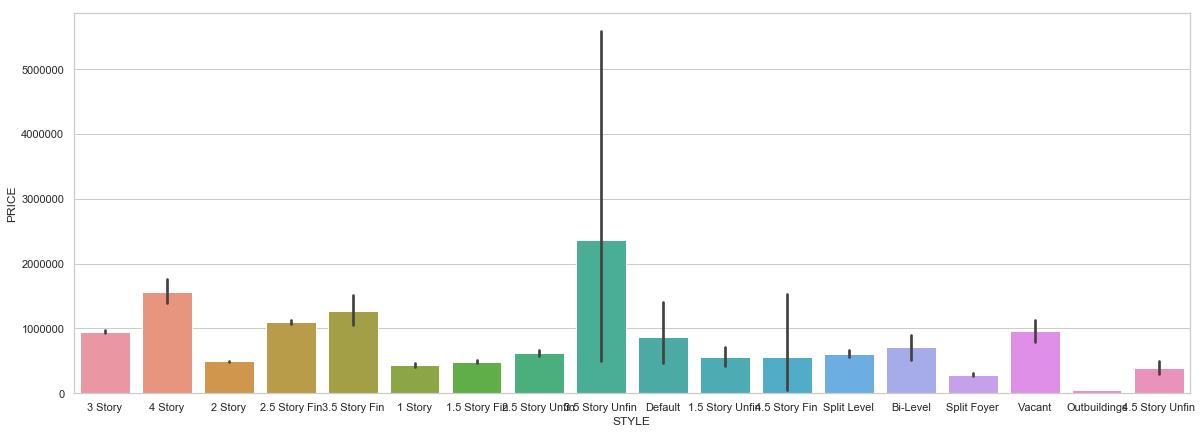

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,7))
ax = sns.barplot(x="STYLE", y="PRICE", data= housing_data_copy)
plt.show()

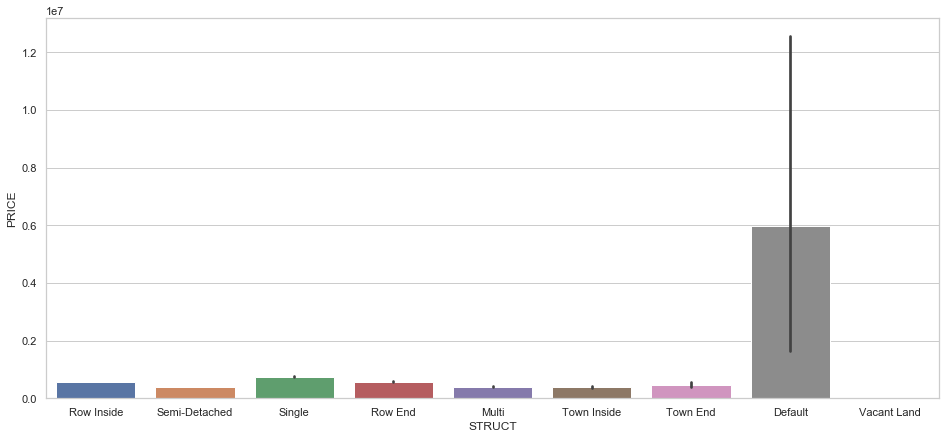

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="STRUCT", y="PRICE", data= housing_data_copy)
plt.show()

# Default structure are highly priced

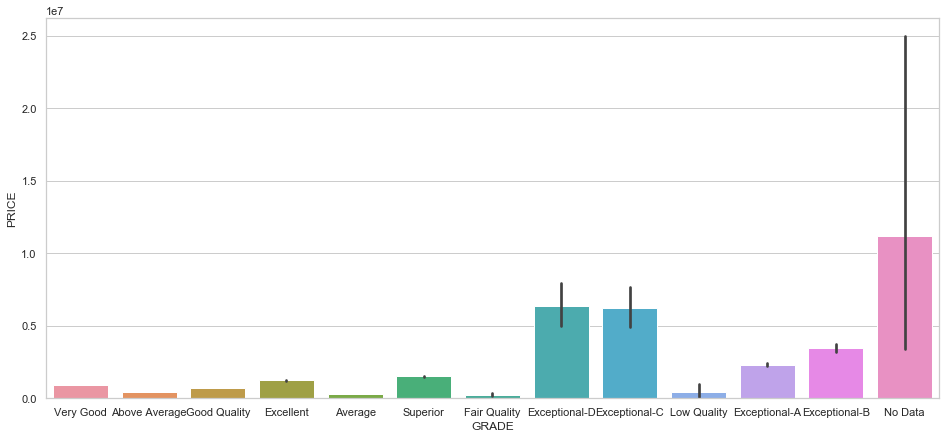

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="GRADE", y="PRICE", data= housing_data_copy)
plt.show()

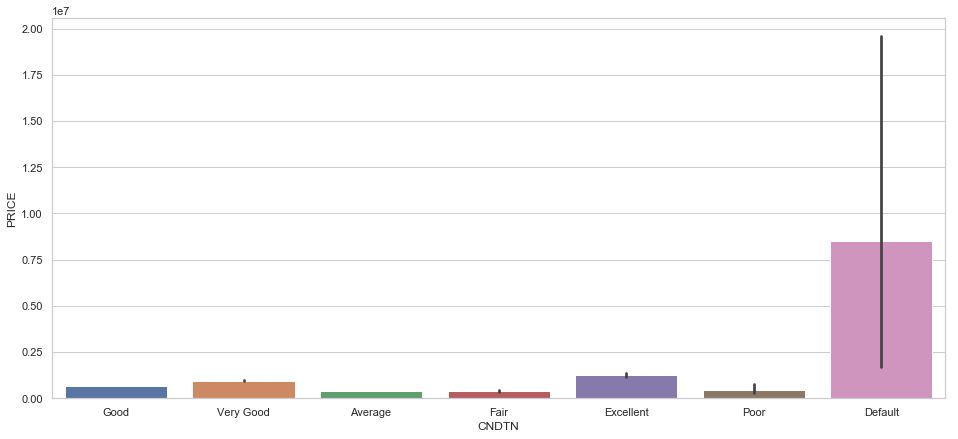

In [28]:

sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="CNDTN", y="PRICE", data= housing_data_copy)
plt.show()

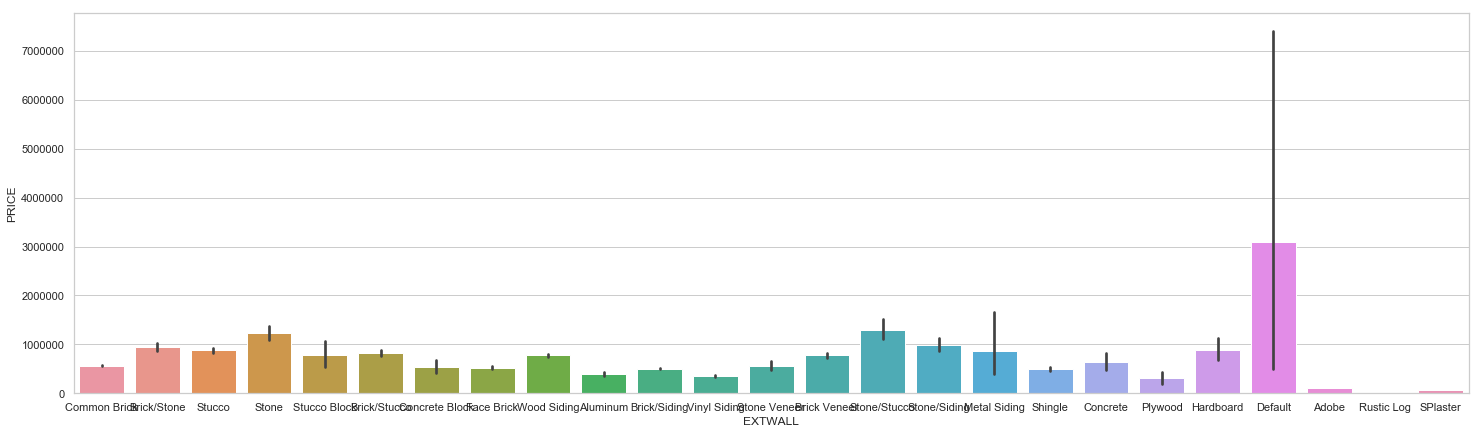

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="EXTWALL", y="PRICE", data= housing_data_copy)
plt.show()

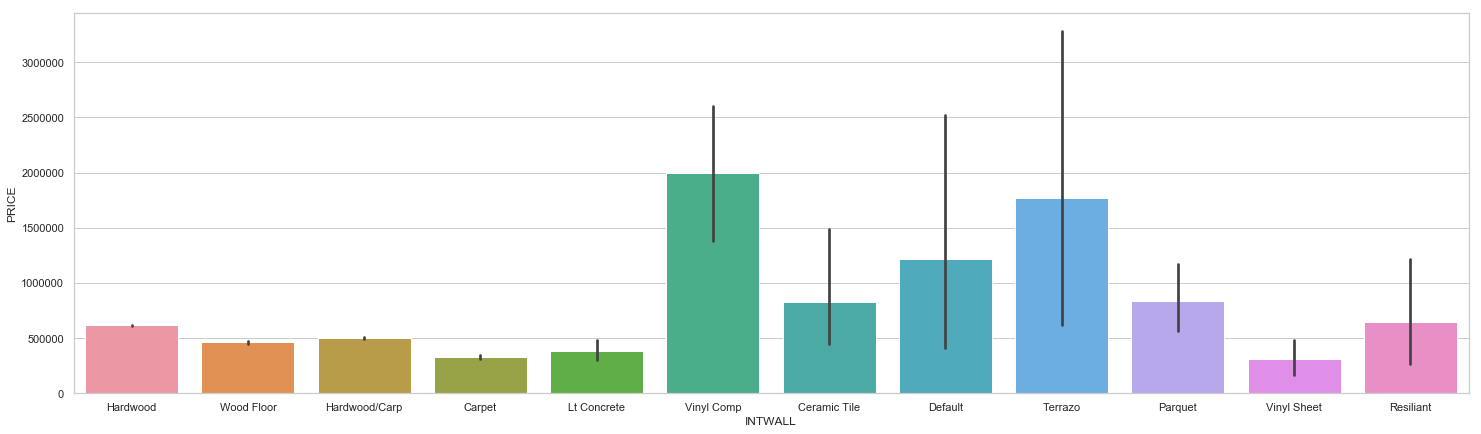

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="INTWALL", y="PRICE", data= housing_data_copy)
plt.show()

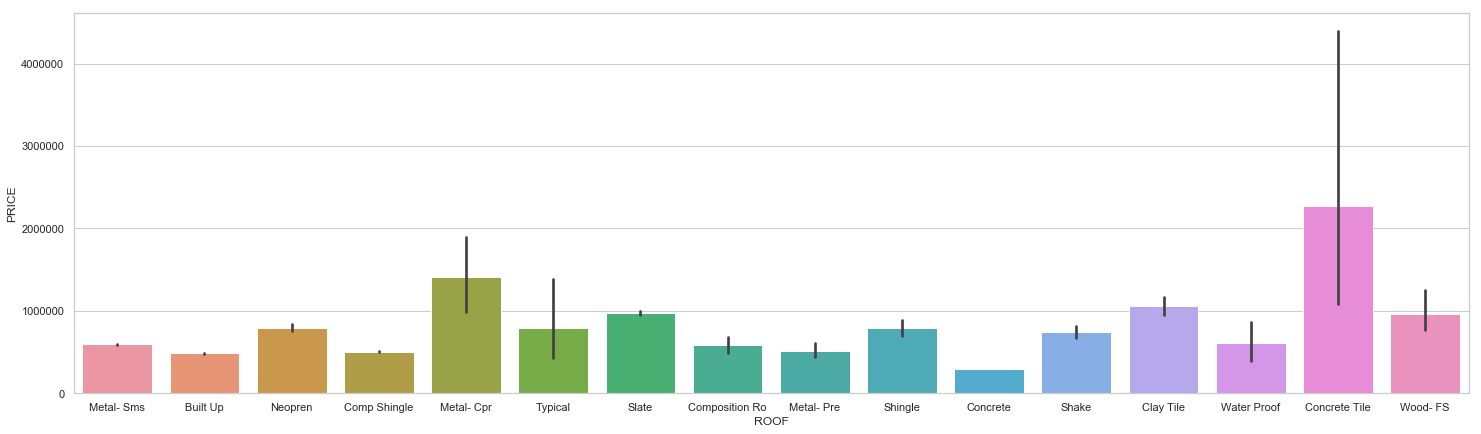

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="ROOF", y="PRICE", data= housing_data_copy)
plt.show()

#Price of concrete tile roof house is more but they are very less in no.

In [85]:
housing_data_copy["ROOF"].value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

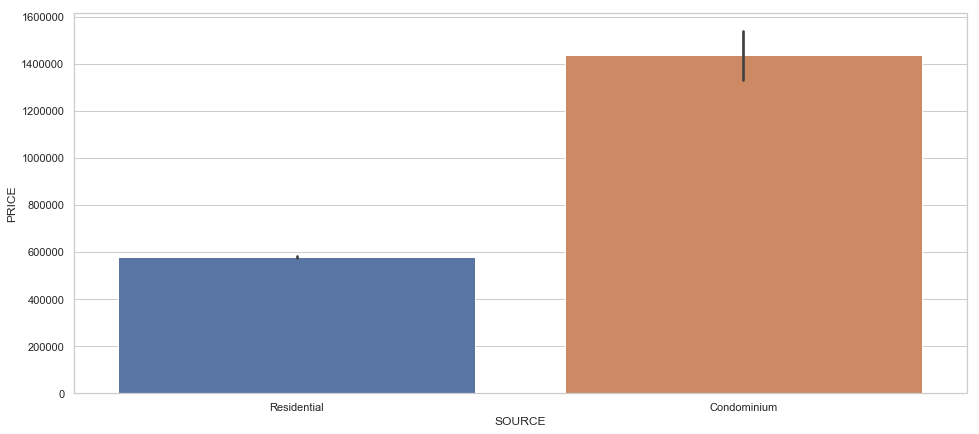

In [33]:
#SOURCE	ASSESSMENT_NBHD	WARD	SQUARE	QUADRANT


sns.set(style="whitegrid")
plt.figure(figsize=(16,7))
ax = sns.barplot(x="SOURCE", y="PRICE", data= housing_data_copy)
plt.show()

In [86]:
housing_data_copy["SOURCE"].value_counts()

Residential    106696
Condominium     52261
Name: SOURCE, dtype: int64

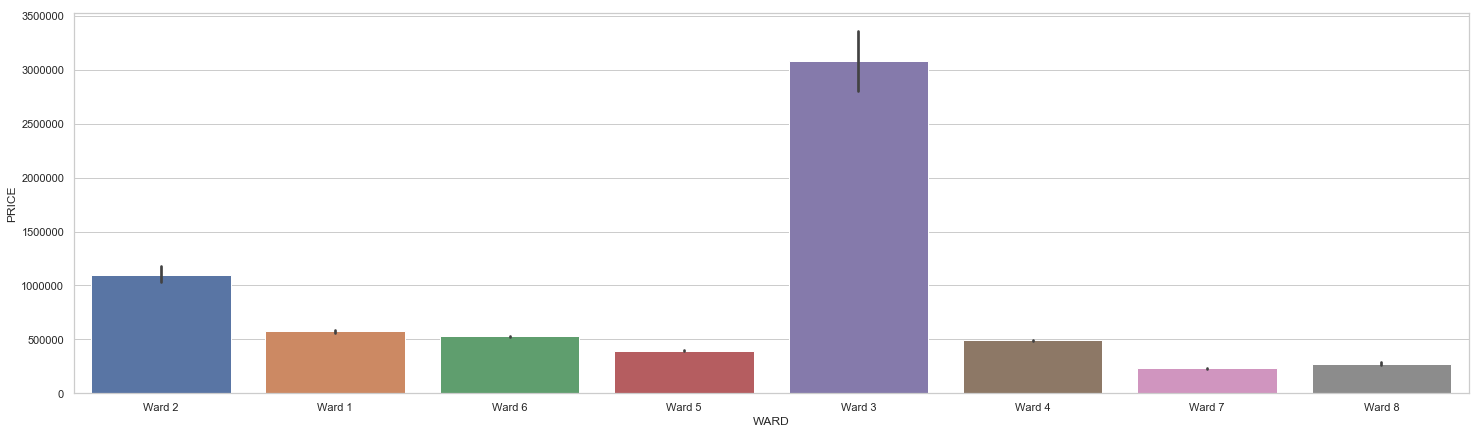

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="WARD", y="PRICE", data= housing_data_copy)
plt.show()

In [87]:
housing_data_copy["WARD"].value_counts()

Ward 6    23973
Ward 3    23688
Ward 4    22202
Ward 2    22167
Ward 5    21359
Ward 1    17455
Ward 7    17206
Ward 8    10906
Name: WARD, dtype: int64

In [37]:
#square- give int
# assessment nbhd - give int

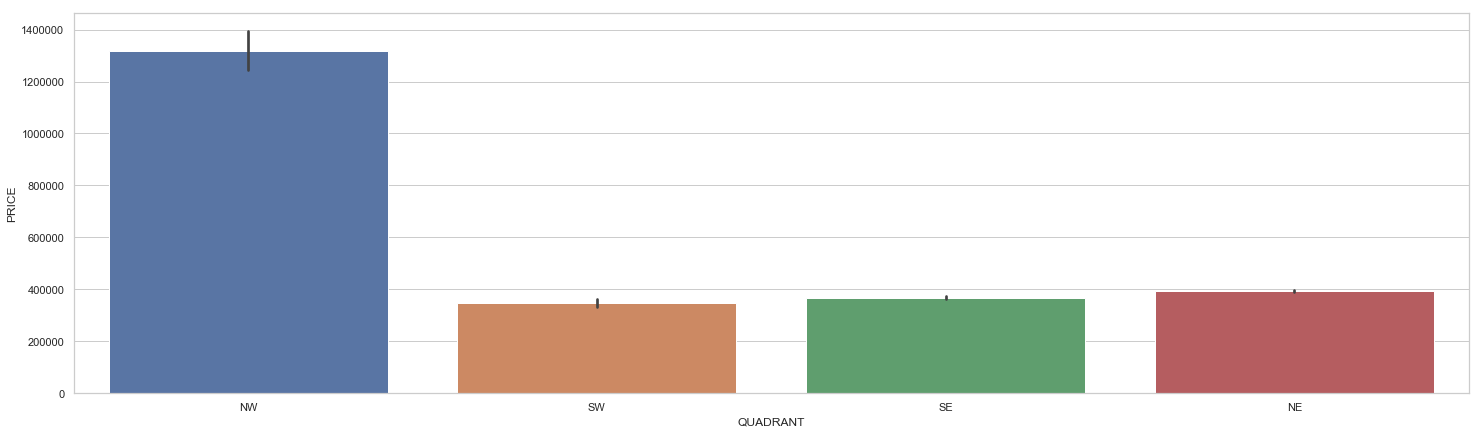

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="QUADRANT", y="PRICE", data= housing_data_copy)
plt.show()

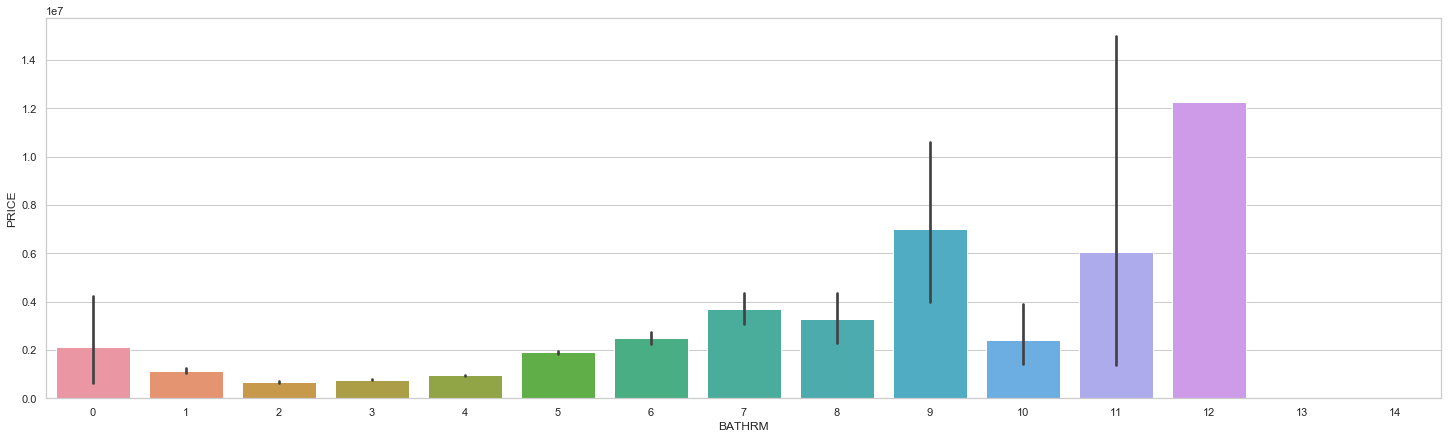

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="BATHRM", y="PRICE", data= housing_data_copy)
plt.show()

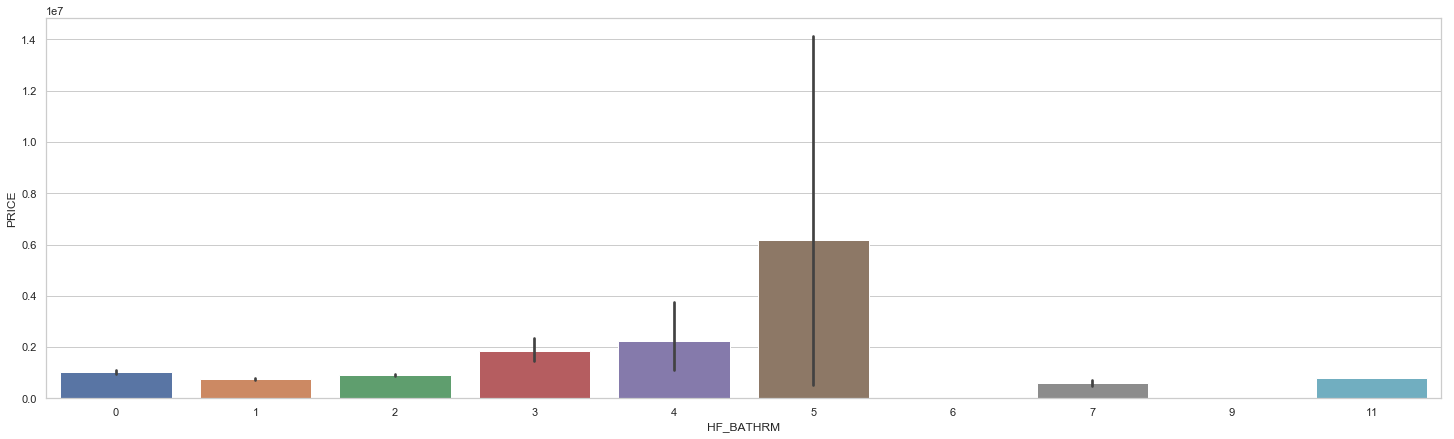

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="HF_BATHRM", y="PRICE", data= housing_data_copy)
plt.show()

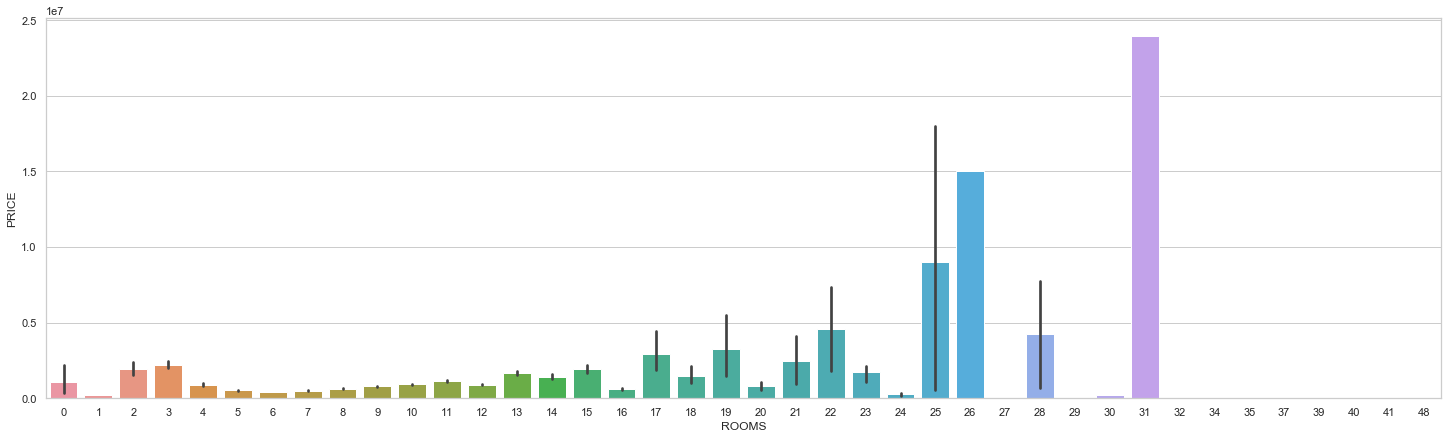

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="ROOMS", y="PRICE", data= housing_data_copy)
plt.show()

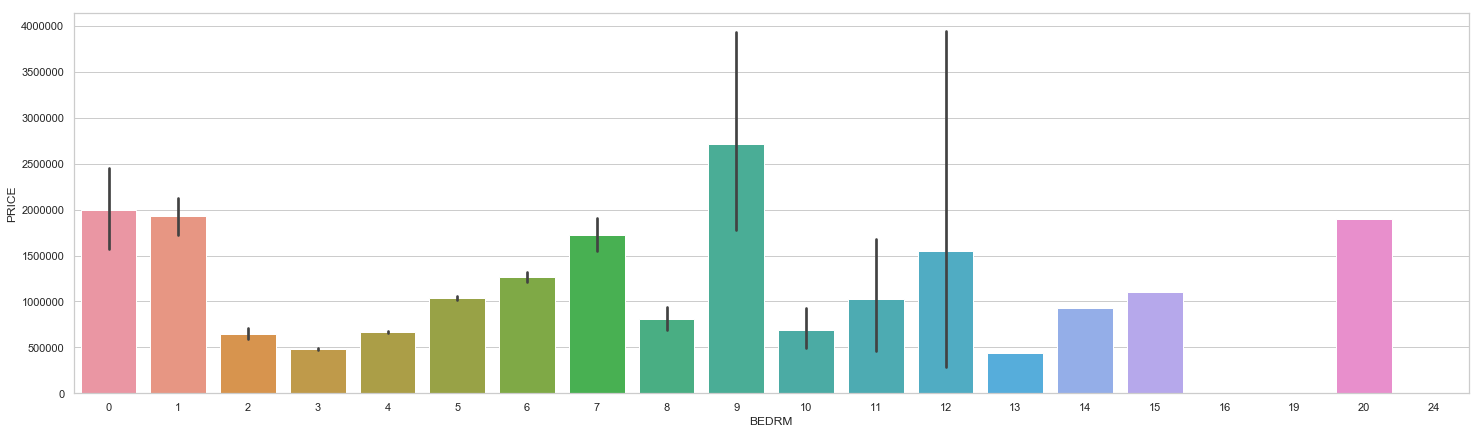

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,7))
ax = sns.barplot(x="BEDRM", y="PRICE", data= housing_data_copy)
plt.show()

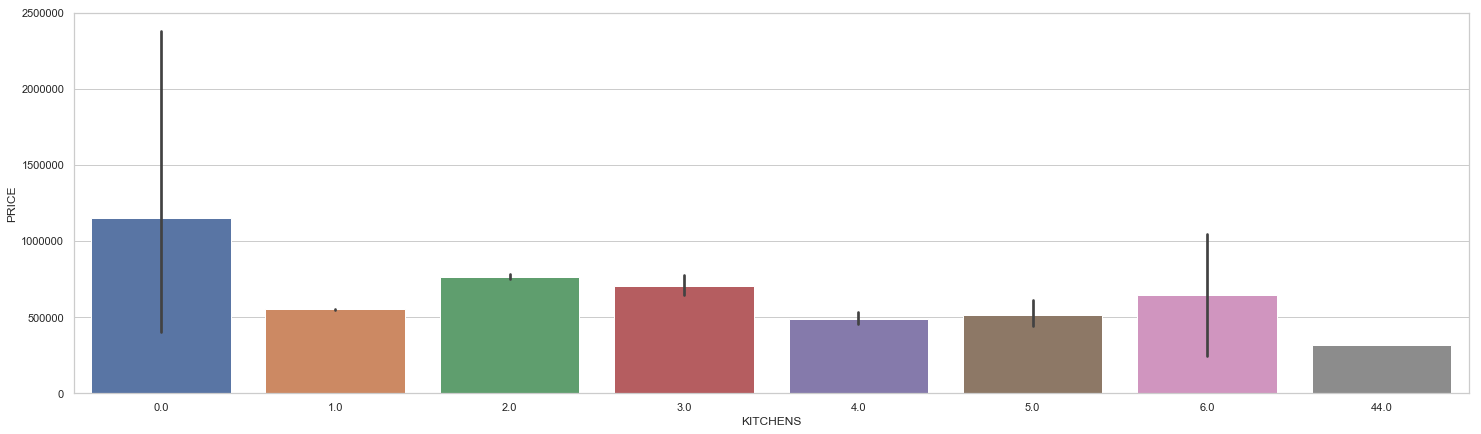

In [50]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x="KITCHENS", y="PRICE", data= housing_data_copy)
plt.show()

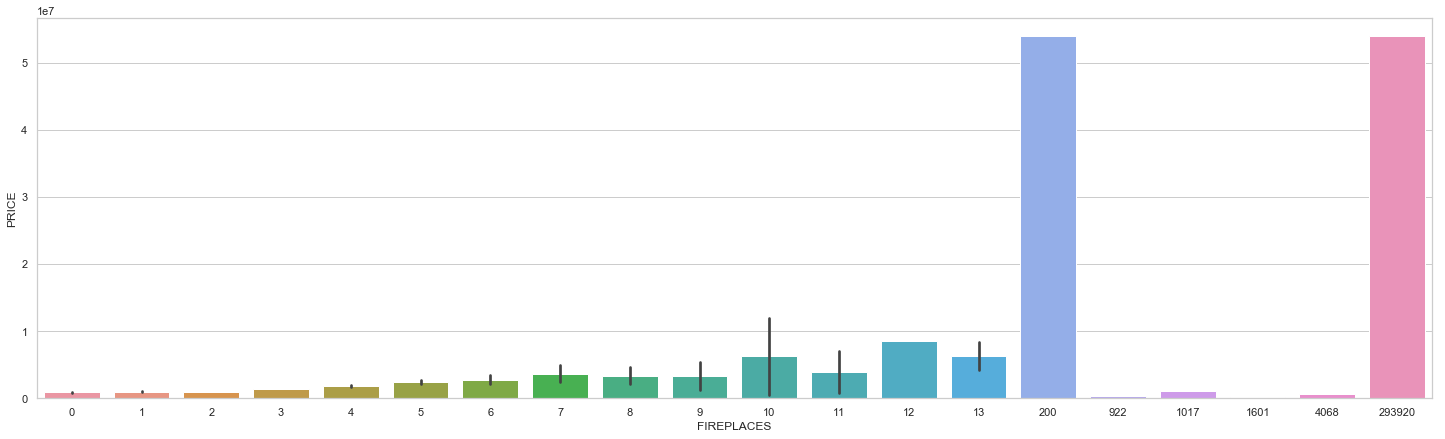

In [51]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x="FIREPLACES", y="PRICE", data= housing_data_copy)
plt.show()

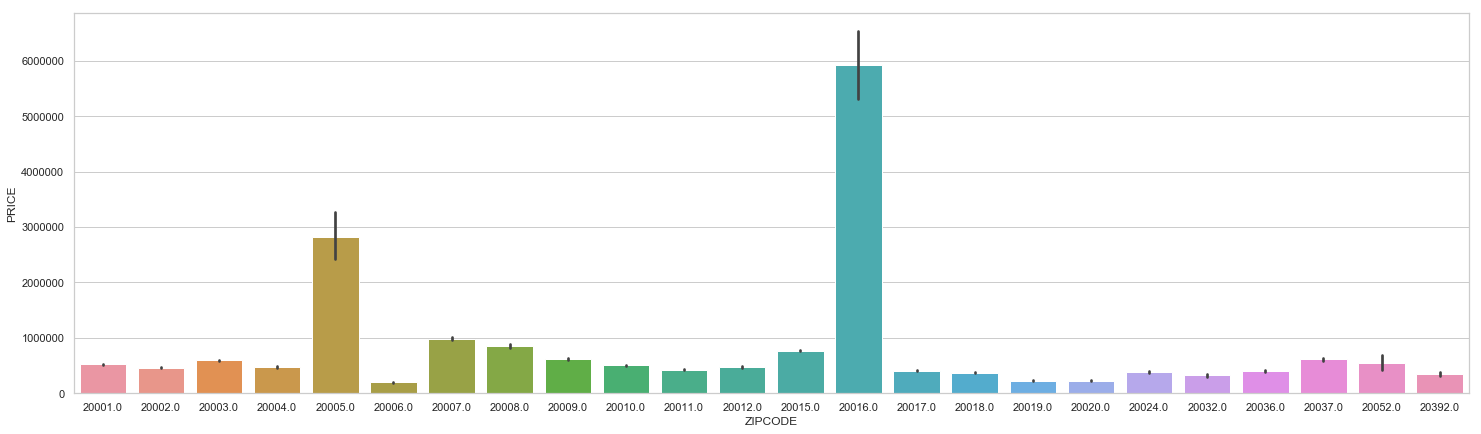

In [52]:
plt.figure(figsize=(25,7))
ax = sns.barplot(x="ZIPCODE", y="PRICE", data= housing_data_copy)
plt.show()

In [88]:
housing_data_copy["ZIPCODE"].value_counts()

20011.0    16352
20002.0    16310
20009.0    13171
20019.0    12458
20016.0    10644
20001.0    10549
20020.0     9805
20007.0     9029
20003.0     8015
20008.0     6801
20010.0     6428
20018.0     5670
20017.0     5622
20015.0     5337
20032.0     5111
20012.0     4118
20037.0     3730
20005.0     3404
20024.0     3105
20036.0     1892
20004.0     1082
20392.0      186
20006.0      118
20052.0       19
Name: ZIPCODE, dtype: int64

In [40]:

housing_int = housing_data_copy.select_dtypes(include=['int64','float'])
housing_int.columns

Index(['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'AYB', 'EYB', 'PRICE',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT'],
      dtype='object')

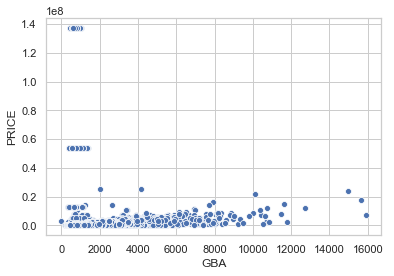

In [89]:
ax = sns.scatterplot(x="GBA", y="PRICE", data=housing_data_copy)

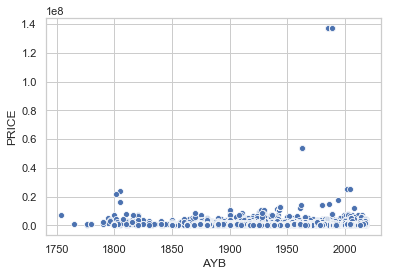

In [90]:
ax = sns.scatterplot(x="AYB", y="PRICE", data=housing_data_copy)

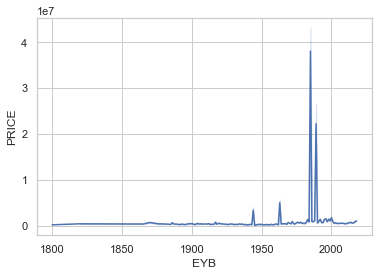

In [47]:
ax = sns.lineplot(x="EYB", y="PRICE", data=housing_data_copy)

# Checking and Treating column wise missing values 

In [15]:
housing_data_copy.isnull().sum()

BATHRM                   0
HF_BATHRM                0
HEAT                     0
AC                       0
ROOMS                    0
BEDRM                    0
AYB                    271
EYB                      0
SALEDATE             26770
PRICE                60741
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                52261
STRUCT               52261
GRADE                52261
CNDTN                52261
EXTWALL              52261
ROOF                 52261
INTWALL              52261
KITCHENS             52262
FIREPLACES               0
USECODE                  0
LANDAREA                 0
GIS_LAST_MOD_DTTM        0
SOURCE                   0
ZIPCODE                  1
LATITUDE                 1
LONGITUDE                1
ASSESSMENT_NBHD          1
CENSUS_TRACT             1
WARD                     1
SQUARE                   0
QUADRANT               237
dtype: int64

In [16]:
housing_data_copy.dtypes

BATHRM                 int64
HF_BATHRM              int64
HEAT                  object
AC                    object
ROOMS                  int64
BEDRM                  int64
AYB                  float64
EYB                    int64
SALEDATE              object
PRICE                float64
QUALIFIED             object
SALE_NUM               int64
GBA                  float64
BLDG_NUM               int64
STYLE                 object
STRUCT                object
GRADE                 object
CNDTN                 object
EXTWALL               object
ROOF                  object
INTWALL               object
KITCHENS             float64
FIREPLACES             int64
USECODE                int64
LANDAREA               int64
GIS_LAST_MOD_DTTM     object
SOURCE                object
ZIPCODE              float64
LATITUDE             float64
LONGITUDE            float64
ASSESSMENT_NBHD       object
CENSUS_TRACT         float64
WARD                  object
SQUARE                object
QUADRANT      

In [17]:
#Object columns with null values

housing_object = housing_data_copy.select_dtypes(include=['O'])

for i in housing_object:
    if(housing_object[i].isnull().sum()!=0):
        print(i)


SALEDATE
STYLE
STRUCT
GRADE
CNDTN
EXTWALL
ROOF
INTWALL
ASSESSMENT_NBHD
WARD
QUADRANT


# Missingness Pattern of Object data types

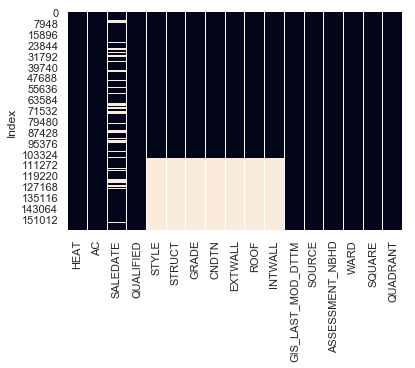

In [94]:
sns.heatmap(housing_object.isnull(), cbar = False)

#So there is a pattern in the missingness of style, struct, grade, cndtn, extwall, roof, intwall,full address,national grid, census

# Imputing Quadrant

In [95]:
housing_data_copy.QUADRANT = housing_data_copy.QUADRANT.fillna(housing_data_copy.QUADRANT.mode()[0]) 
housing_data_copy.QUADRANT.isnull().sum()

0

# Imputing Saledate

In [31]:
# Going by each object column with missing values

housing_data_copy['SALEDATE']=pd.to_datetime(housing_data_copy['SALEDATE'], format="%Y/%m/%d")


In [32]:
housing_data_copy['SALEDATE']= housing_data_copy['SALEDATE'].dt.year

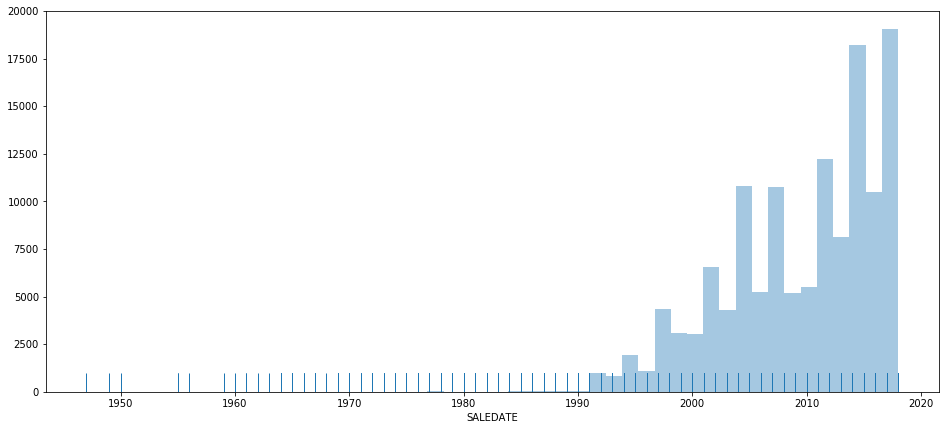

In [33]:
#Graph before imputation of missing values 
# It is left skewed
plt.figure(figsize=(16,7))
sns.distplot(housing_data_copy['SALEDATE'].dropna(), kde=False, rug=True)
plt.show()

In [34]:
from dateutil.parser import parse
import datetime

In [35]:
#housing_data_copy['sale_year'].value_counts()

In [36]:
housing_data_copy['SALEDATE'].interpolate(inplace=True)

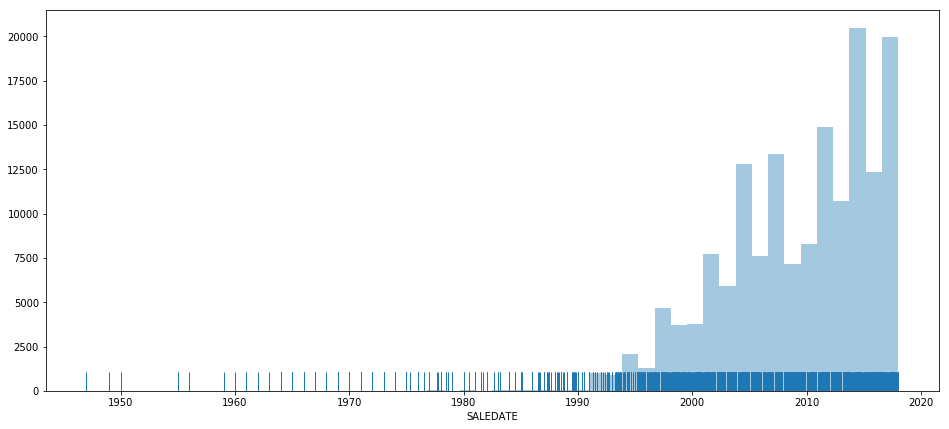

In [37]:
#Graph after sale date missing values imputation

plt.figure(figsize=(16,7))
sns.distplot(housing_data_copy['SALEDATE'], kde=False, rug=True)
plt.show()

# Imputing through function,
# On following columns:
# CNDTN, EXTWALL, ROOF, INTWALL,STYLE,STRUCT,GRADE

In [63]:
# As around 33% of the data is missing in CNDTN, EXTWALL, ROOF, INTWALL,STYLE,STRUCT,GRADE columns, 
# imputing those with mode will not be a great strategy 
# 15% shall be imputed with mode
# A new category named as "Other" category is created for those whose frequency is less
# And Rest 15% nan shall be included in "Other" category

In [64]:
for i in housing_data_copy[["CNDTN", "EXTWALL", "ROOF", "INTWALL","STYLE","STRUCT","GRADE"]]:
    series = pd.value_counts(housing_data_copy[i])
    #print(series)
    mask = (series/series.sum() * 100).lt(1)
    #print(mask)
    # To replace df['column'] use np.where I.e 
    housing_data_copy[i] = np.where(housing_data_copy[i].isin(series[mask].index),'Other',housing_data_copy[i])

    new = series[~mask]
    new['Other'] = series[mask].sum()

    pd.value_counts(housing_data_copy[i])
    
    y = housing_data_copy.loc[housing_data_copy[i].isnull(),]
    y1 = y.iloc[0:26130,]
    #print(y1)
    y1.loc[:,i]= housing_data_copy[i].mode()[0]
    # print(y1[i])
    # print(y1[i].isnull().sum())
   
    y2 = y.iloc[26130:52261,]
    y2.loc[:,i]= "Other"
    y1 = y1.append(y2)
    #print(y1)
    housing_data_copy.loc[106696:158956,i]=y1.loc[106696:158956,i]
    print("no. of missing values in",i,"are",housing_data_copy[i].isnull().sum())

   

C:\Users\my\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


no. of missing values in CNDTN are 0
no. of missing values in EXTWALL are 0
no. of missing values in ROOF are 0
no. of missing values in INTWALL are 0
no. of missing values in STYLE are 0
no. of missing values in STRUCT are 0
no. of missing values in GRADE are 0


In [65]:
#housing_data_copy["STYLE"].fillna(housing_data_copy["STYLE"].value_counts().idxmax())

# Checking and imputing missingness of int and float columns

In [66]:
# int and float columns with null values

housing_int = housing_data_copy.select_dtypes(include =['int64','float64'])


for i in housing_int:
    if(housing_int[i].isnull().sum()!=0):
        print(i)
    

PRICE


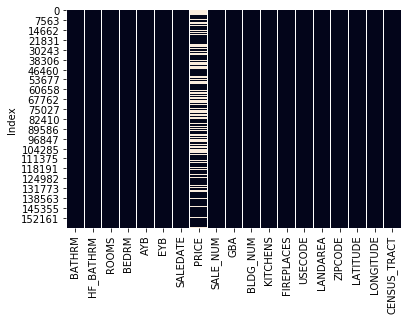

In [67]:
sns.heatmap(housing_int.isnull(), cbar = False)

# Imputing kitchen 

In [68]:
housing_data_copy.KITCHENS.mean()

# As the histogram distribution tells the graph is highly right skewed, 
# let's replace the values with median as mean doen't make sense

housing_data_copy.KITCHENS =housing_data_copy.KITCHENS.fillna(housing_data_copy.KITCHENS.median())
housing_data_copy['KITCHENS'].isnull().sum()

0

In [69]:
housing_data_copy.WARD  = housing_data_copy.WARD.fillna(housing_data_copy.WARD.mode()[0]) 
housing_data_copy.SQUARE  = housing_data_copy.SQUARE.fillna(housing_data_copy.SQUARE.mode()[0]) 
housing_data_copy.ASSESSMENT_NBHD  = housing_data_copy.ASSESSMENT_NBHD.fillna(housing_data_copy.ASSESSMENT_NBHD.mode()[0]) 

In [70]:
housing_data_copy['ZIPCODE'].interpolate(inplace=True)
housing_data_copy['LATITUDE'].interpolate(inplace=True)
housing_data_copy['LONGITUDE'].interpolate(inplace=True)
housing_data_copy['CENSUS_TRACT'].interpolate(inplace=True)
housing_data_copy['AYB'].interpolate(inplace=True)

In [71]:
housing_data_copy.info()

#so except price all the null values are filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149334 entries, 0 to 158956
Data columns (total 35 columns):
BATHRM               149334 non-null int64
HF_BATHRM            149334 non-null int64
HEAT                 149334 non-null object
AC                   149334 non-null object
ROOMS                149334 non-null int64
BEDRM                149334 non-null int64
AYB                  149334 non-null float64
EYB                  149334 non-null int64
SALEDATE             149334 non-null float64
PRICE                93013 non-null float64
QUALIFIED            149334 non-null object
SALE_NUM             149334 non-null int64
GBA                  149334 non-null float64
BLDG_NUM             149334 non-null int64
STYLE                149334 non-null object
STRUCT               149334 non-null object
GRADE                149334 non-null object
CNDTN                149334 non-null object
EXTWALL              149334 non-null object
ROOF                 149334 non-null object
INTWALL      

In [72]:
# Relation between price and different int variables

# Outliers treatment

In [73]:
housing_int = housing_data_copy.select_dtypes(include=['int64','float64'])
housing_int.columns

Index(['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'AYB', 'EYB', 'SALEDATE',
       'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'CENSUS_TRACT'],
      dtype='object')

In [74]:
housing_int2 = housing_int[['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM','EYB', 'SALEDATE','SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE','CENSUS_TRACT']]

# Checking if outlier removal makes sense or not

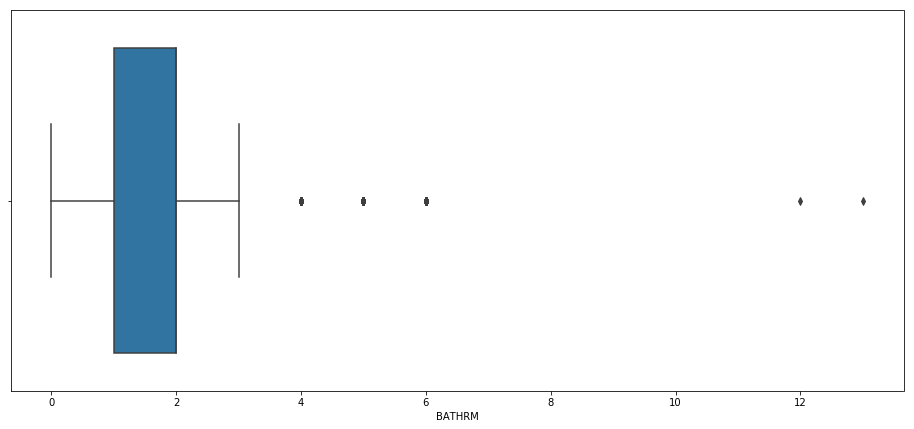

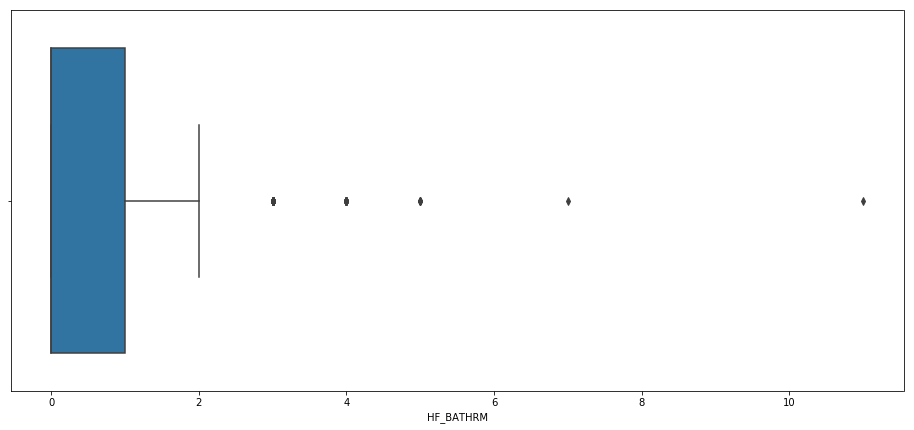

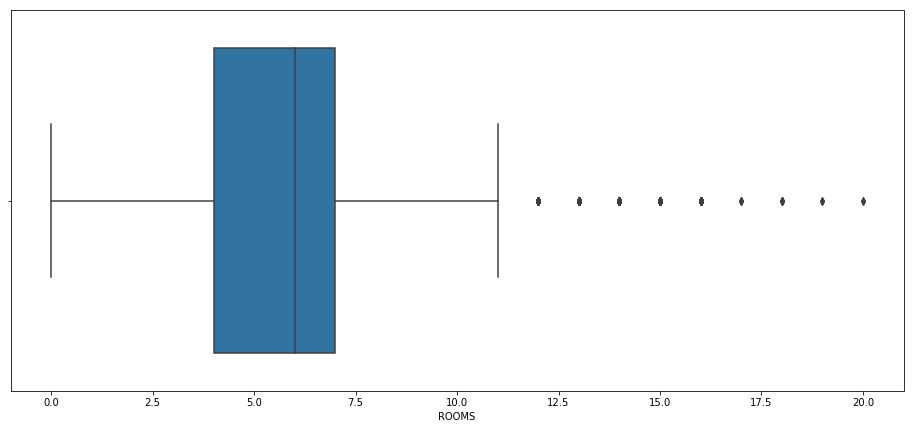

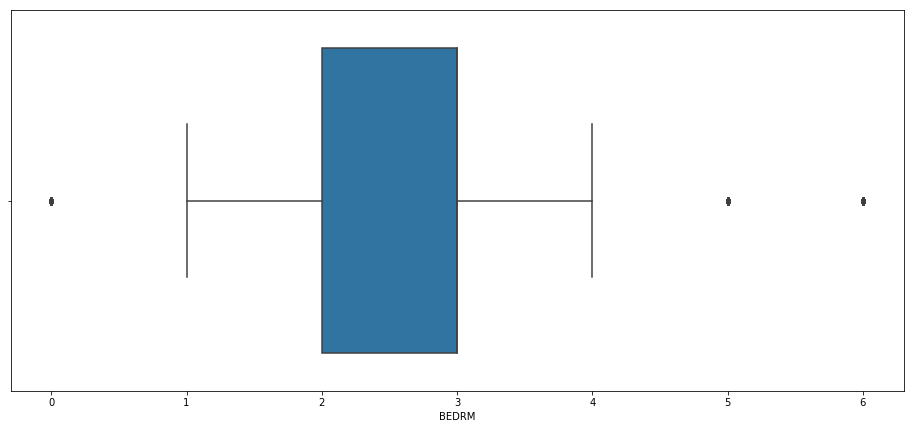

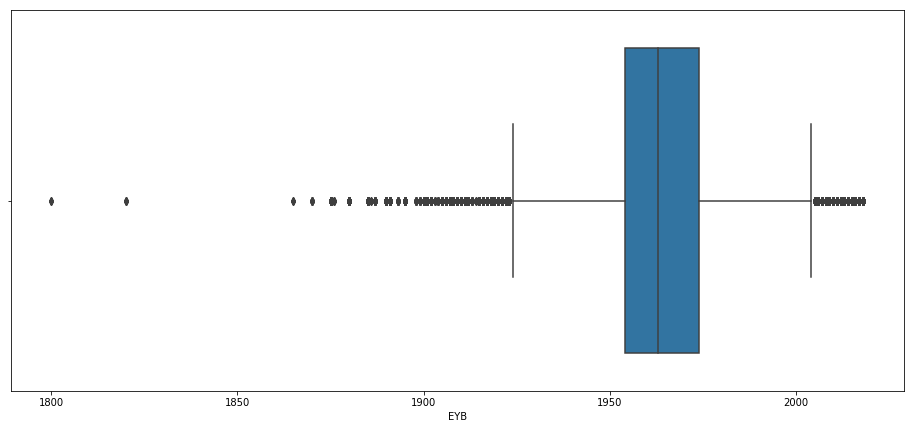

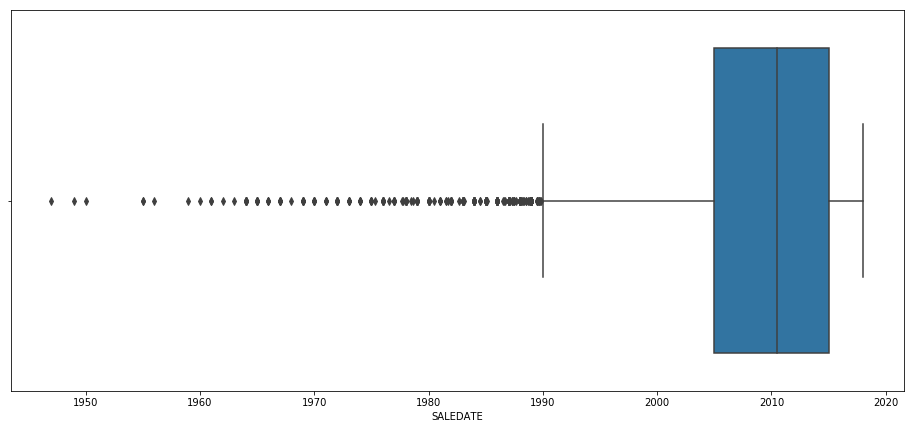

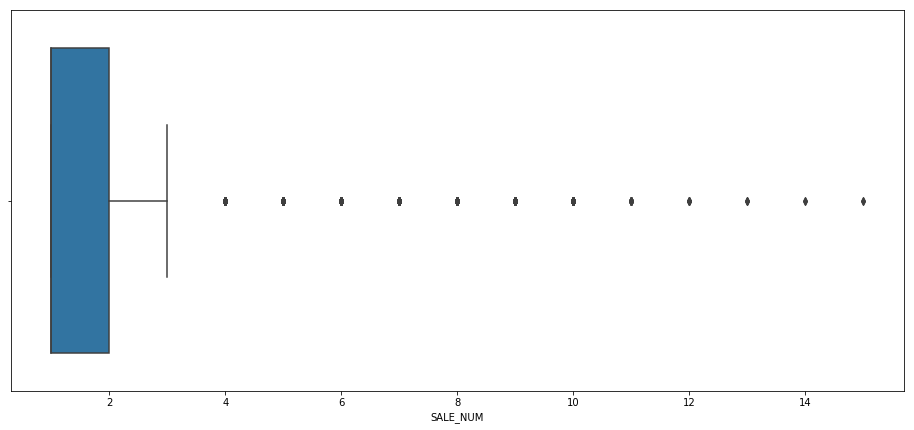

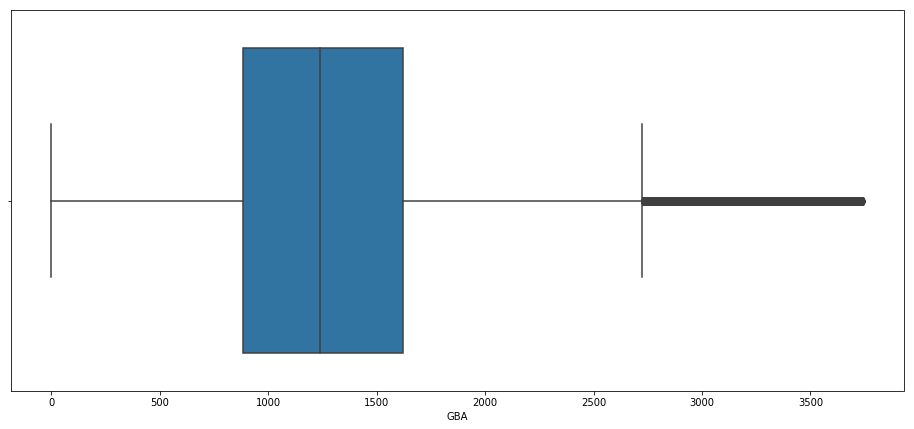

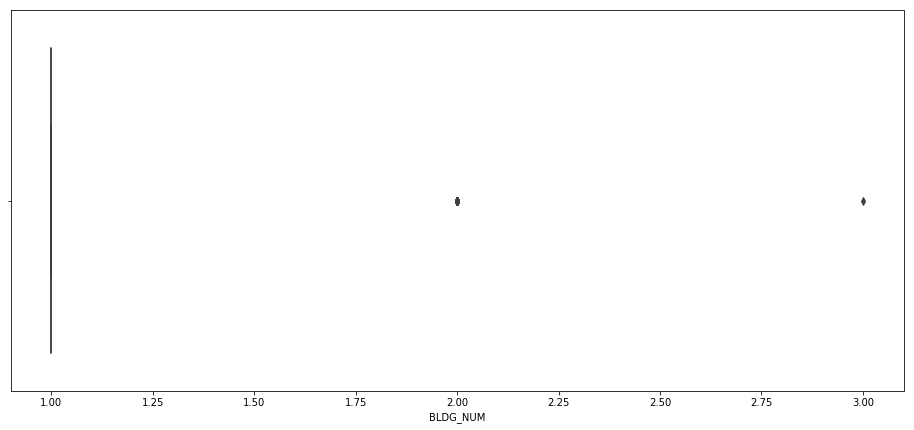

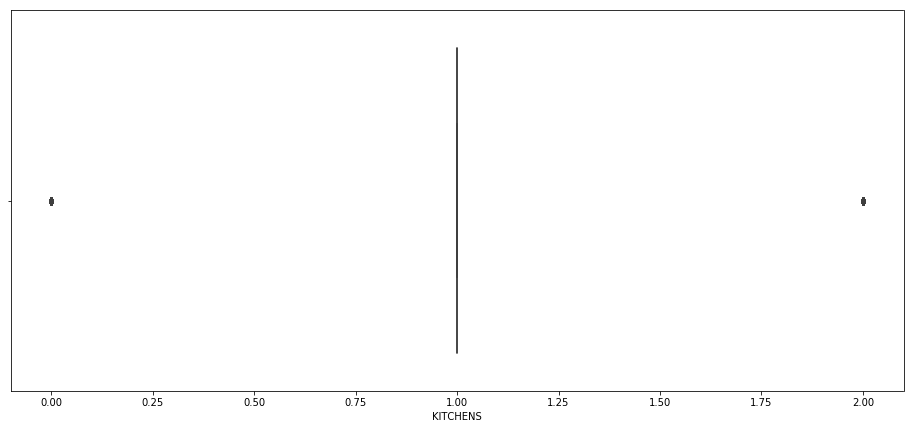

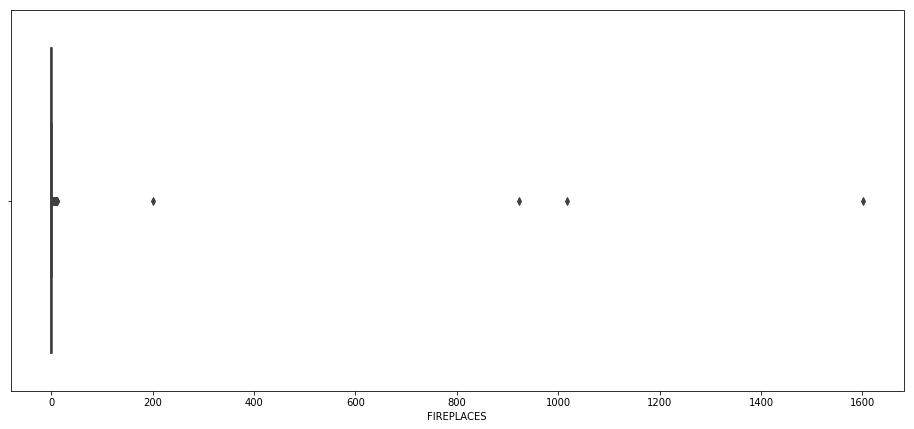

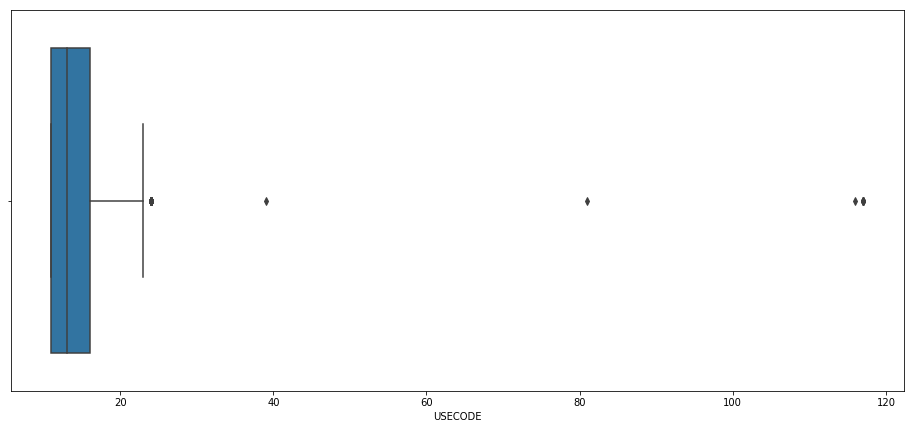

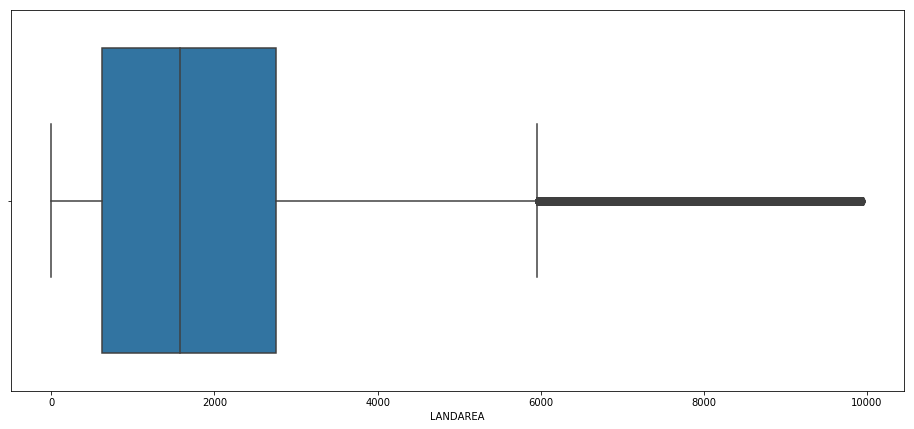

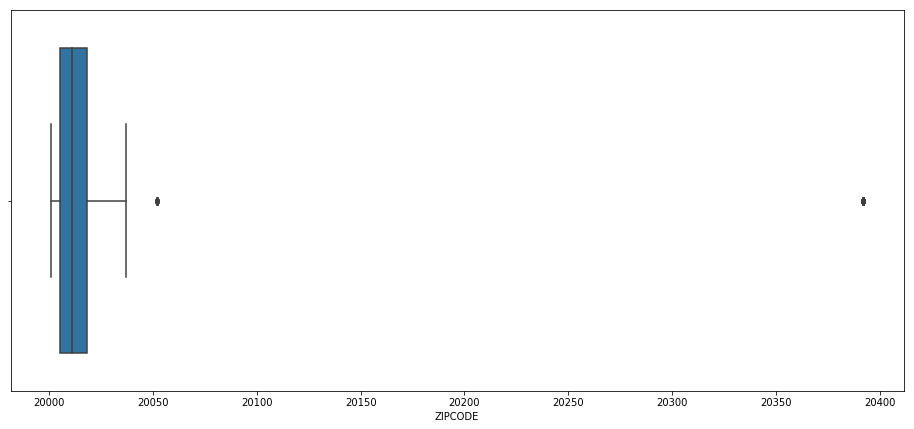

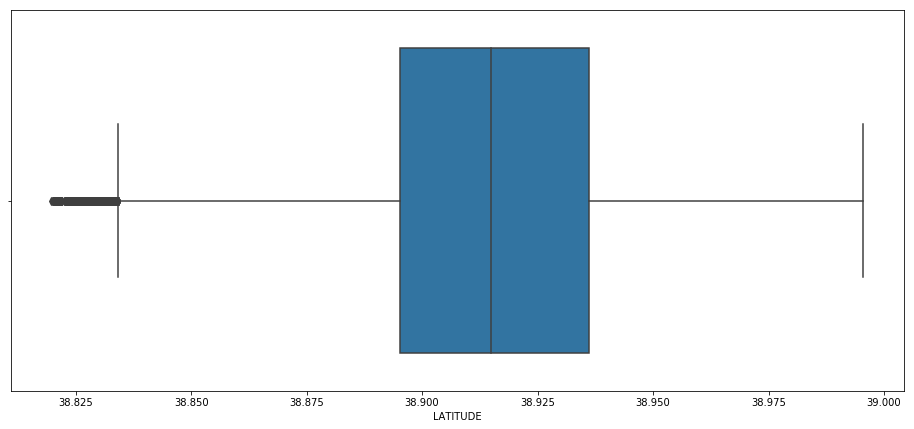

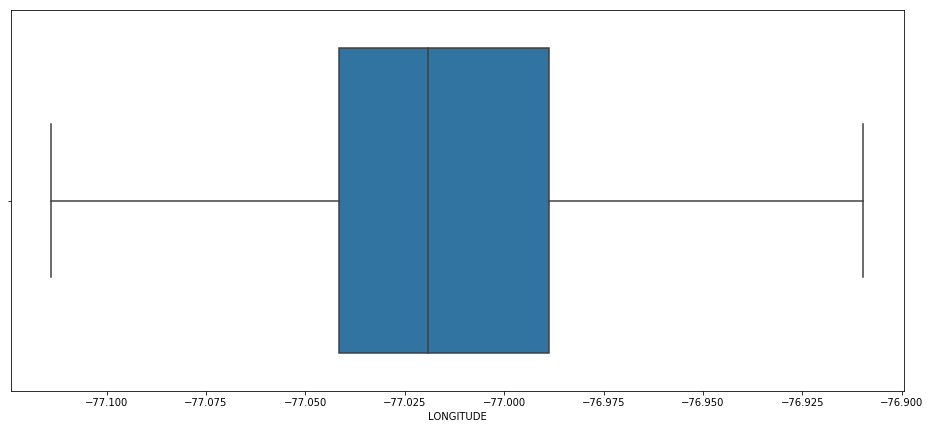

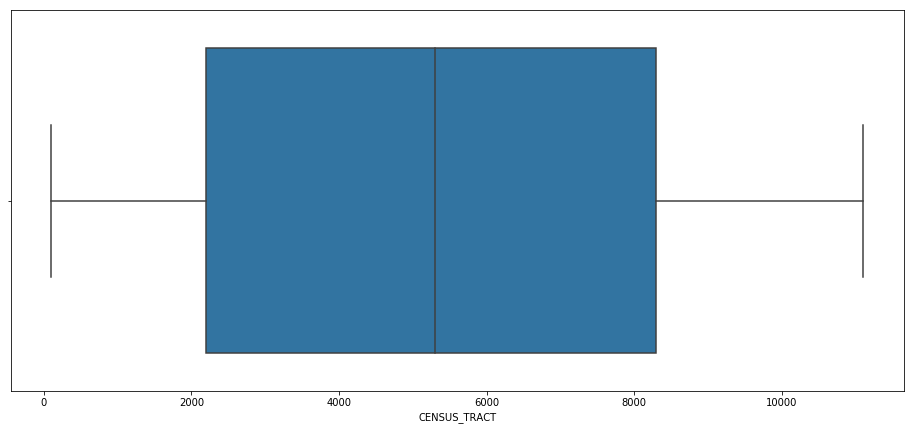

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in housing_int2:
    plt.figure(figsize=(16,7))
    sns.boxplot(x=housing_int2[i])
    plt.show()
    
# Bathroom - Keeping outlier as 4 bathroom makes sense
# HF Bathroom - No outlier
# Rooms - Outliers in rooms makes sense
# Bed room - Outlier 0 bedroom where room is more than 2 shall be removed##############################################
# EYB, saledate, sale num - Outliers shall be kept
# GBA - Outlier should be treated as for ex Area 0 doesn't make any sense #################################################
# BLdg_num - Outlier can be kept
# Kitchen - Outliers shall be treated ###############################################################################
# fireplaces - Outliers shall be treated ###############################################################################
# Usecode - Keeping outliers as it makes sense
# Landarea - Outliers shall be treated ###############################################################################
# Zipcode, Latitude, Longitude, census tract outliers can be kept.


In [76]:
housing_int3 = housing_int2[["BEDRM","GBA","KITCHENS","FIREPLACES", "LANDAREA"]]

# Calculating and removing by z score calculation

In [77]:
from scipy import stats

In [78]:
for i in housing_int3:
    z = np.abs(stats.zscore(housing_data_copy[i]))
    housing_data_copy = housing_data_copy[(z < 3)]


In [79]:
housing_data_copy.shape

# earlier it was (158957, 35)
# so around 9623 rows are cut down to remove outliers

(134310, 35)

In [80]:
housing_data_copy.isnull().sum()

BATHRM                   0
HF_BATHRM                0
HEAT                     0
AC                       0
ROOMS                    0
BEDRM                    0
AYB                      0
EYB                      0
SALEDATE                 0
PRICE                50432
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                    0
STRUCT                   0
GRADE                    0
CNDTN                    0
EXTWALL                  0
ROOF                     0
INTWALL                  0
KITCHENS                 0
FIREPLACES               0
USECODE                  0
LANDAREA                 0
GIS_LAST_MOD_DTTM        0
SOURCE                   0
ZIPCODE                  0
LATITUDE                 0
LONGITUDE                0
ASSESSMENT_NBHD          0
CENSUS_TRACT             0
WARD                     0
SQUARE                   0
QUADRANT               133
dtype: int64

In [83]:
housing_data_copy_price_notnull = housing_data_copy.loc[~housing_data_copy["PRICE"].isnull(),]

In [82]:
housing_data_copy_price_notnull.isnull().sum()

BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
ROOMS                 0
BEDRM                 0
AYB                   0
EYB                   0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
ZIPCODE               0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
CENSUS_TRACT          0
WARD                  0
SQUARE                0
QUADRANT             58
dtype: int64

In [123]:
housing_data_copy_price_notnull.dtypes

BATHRM                 int64
HF_BATHRM              int64
HEAT                  object
AC                    object
ROOMS                  int64
BEDRM                  int64
AYB                  float64
EYB                    int64
SALEDATE             float64
PRICE                float64
QUALIFIED             object
SALE_NUM               int64
GBA                  float64
BLDG_NUM               int64
STYLE                 object
STRUCT                object
GRADE                 object
CNDTN                 object
EXTWALL               object
ROOF                  object
INTWALL               object
KITCHENS             float64
FIREPLACES             int64
USECODE                int64
LANDAREA               int64
GIS_LAST_MOD_DTTM     object
SOURCE                object
ZIPCODE              float64
LATITUDE             float64
LONGITUDE            float64
ASSESSMENT_NBHD       object
CENSUS_TRACT         float64
WARD                  object
SQUARE                object
QUADRANT      

In [84]:
housing_data_copy_price_notnull["ZIPCODE"] = housing_data_copy_price_notnull.ZIPCODE.astype(object)
#housing_data_copy_price_notnull["ASSESSMENT_SUBNBHD"] = housing_data_copy_price_notnull.ASSESSMENT_SUBNBHD.astype(object)

C:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


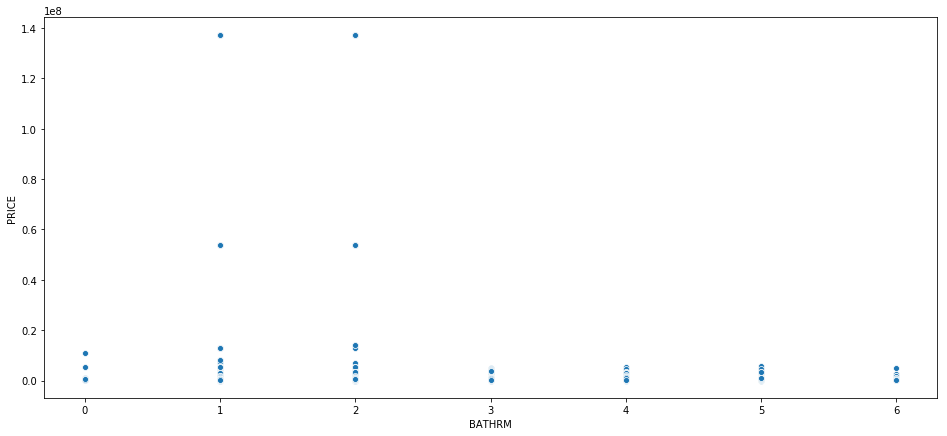

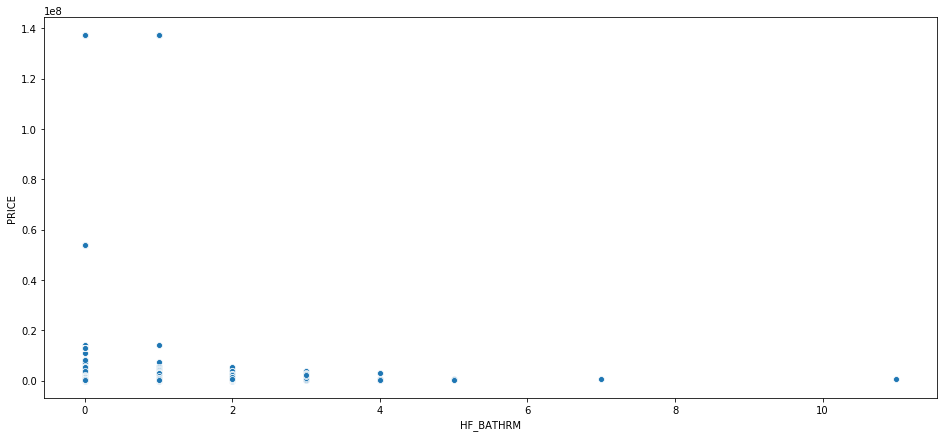

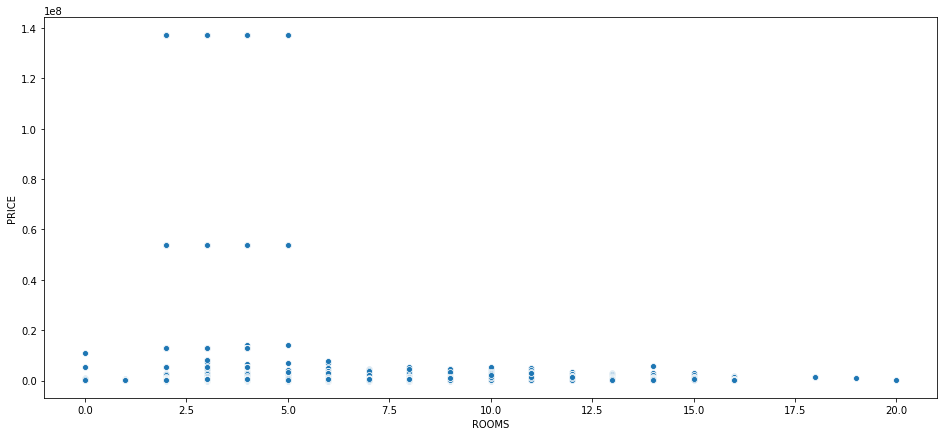

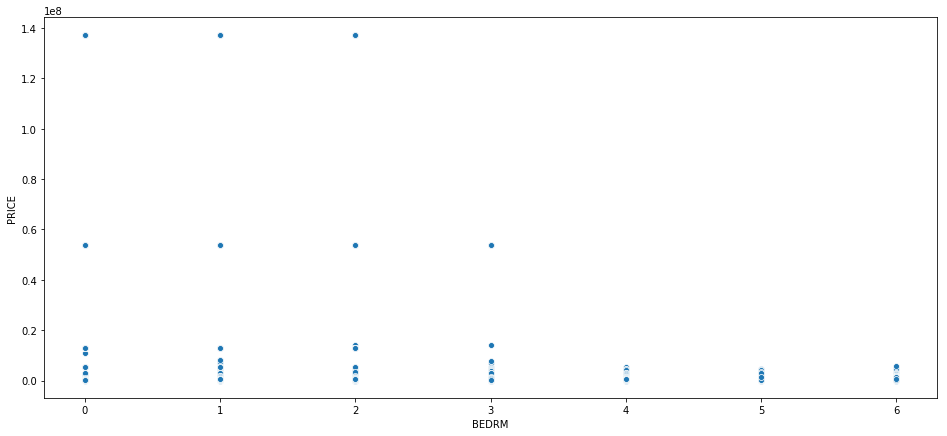

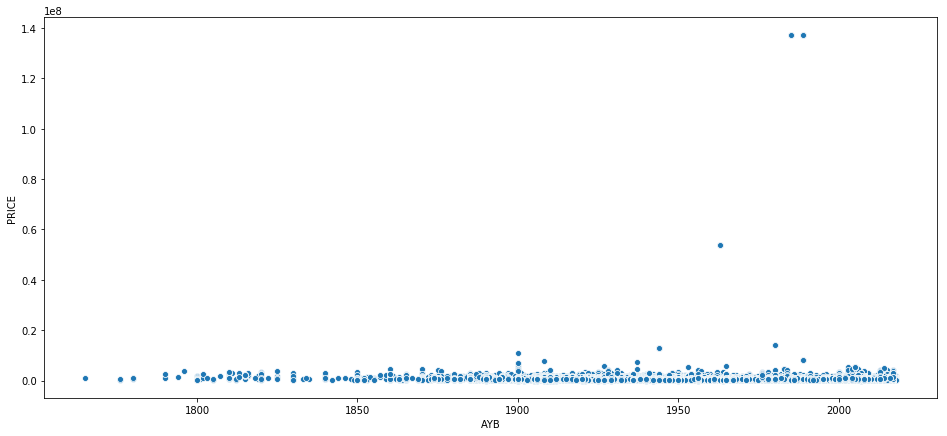

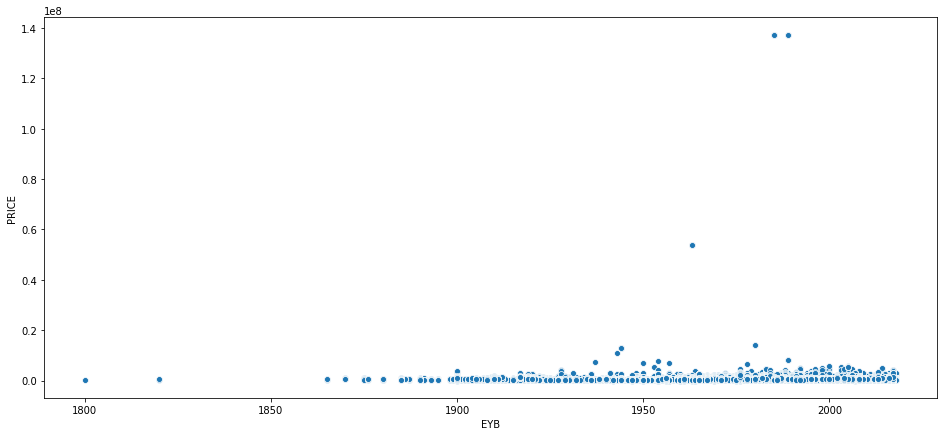

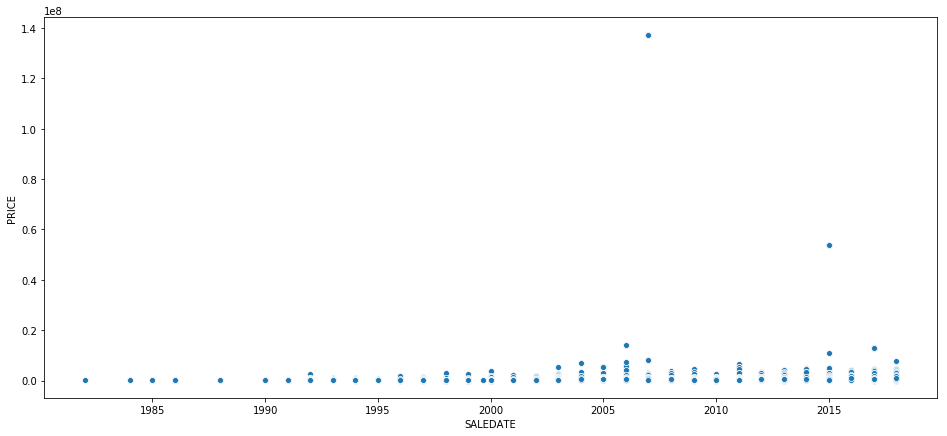

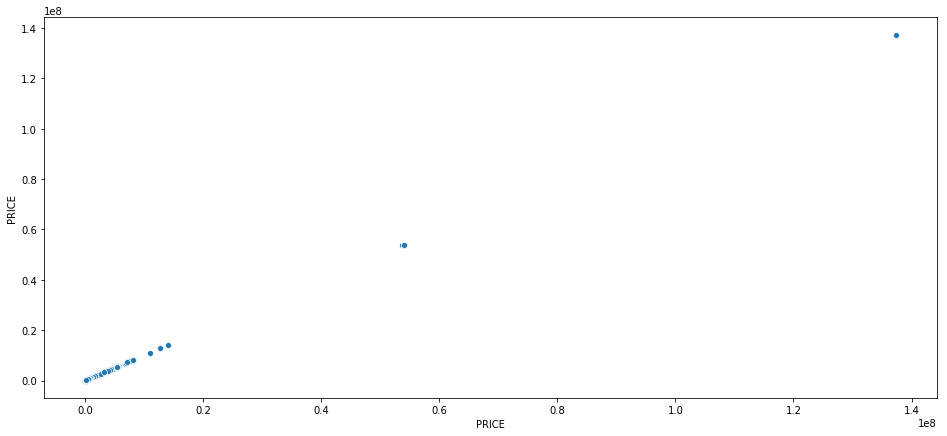

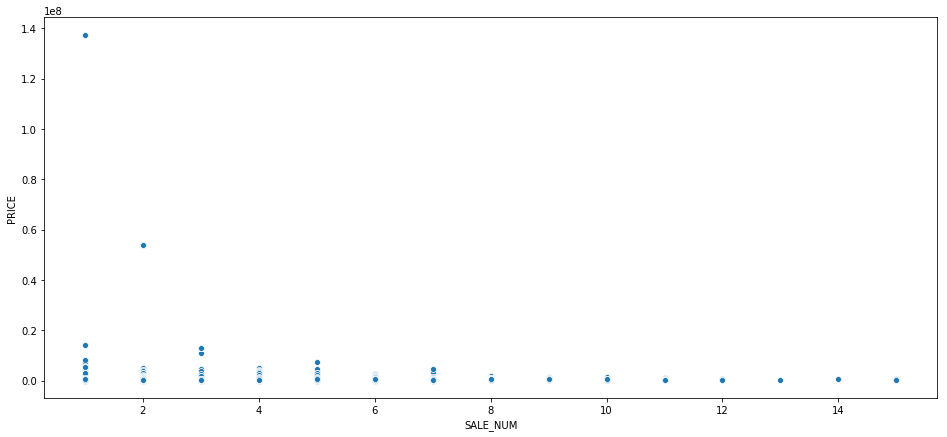

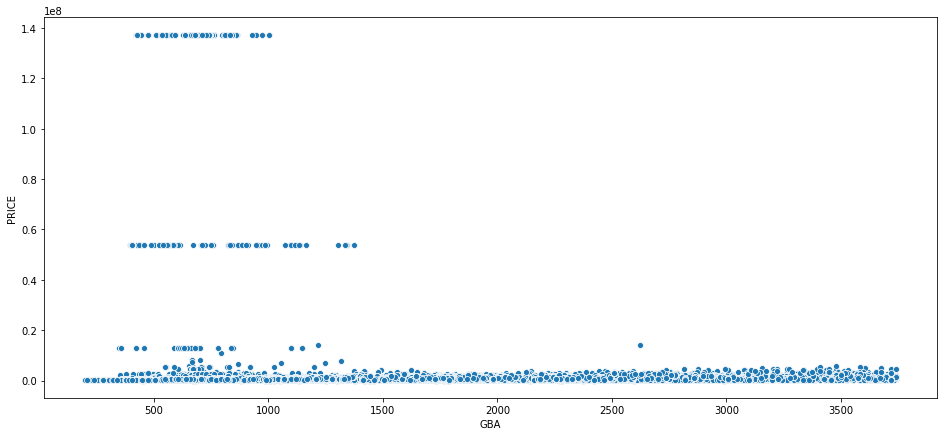

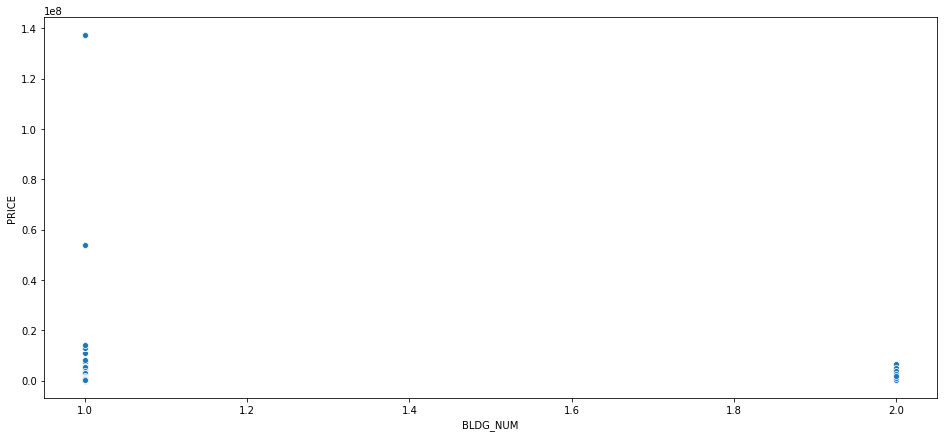

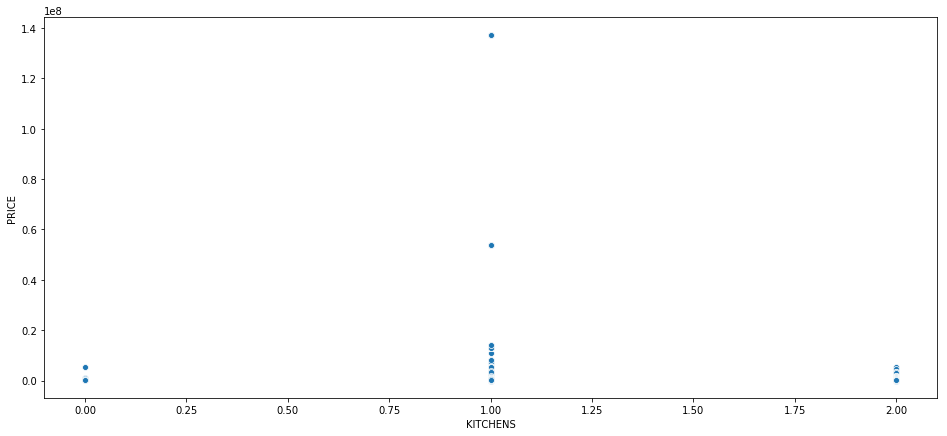

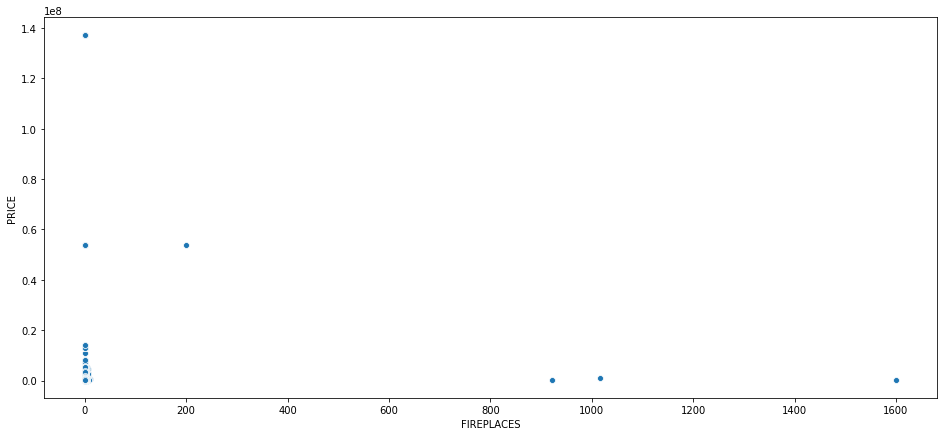

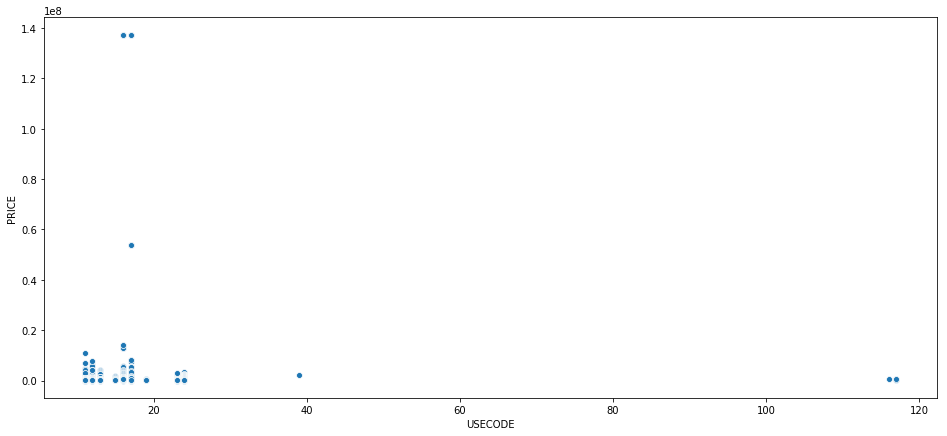

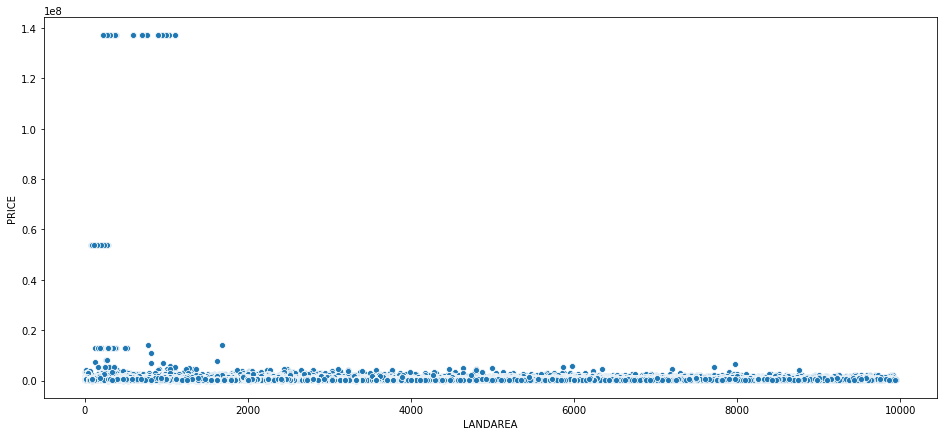

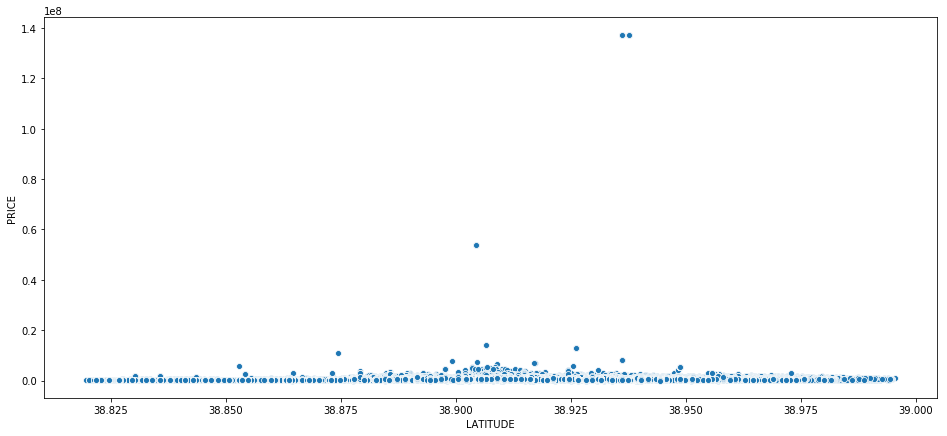

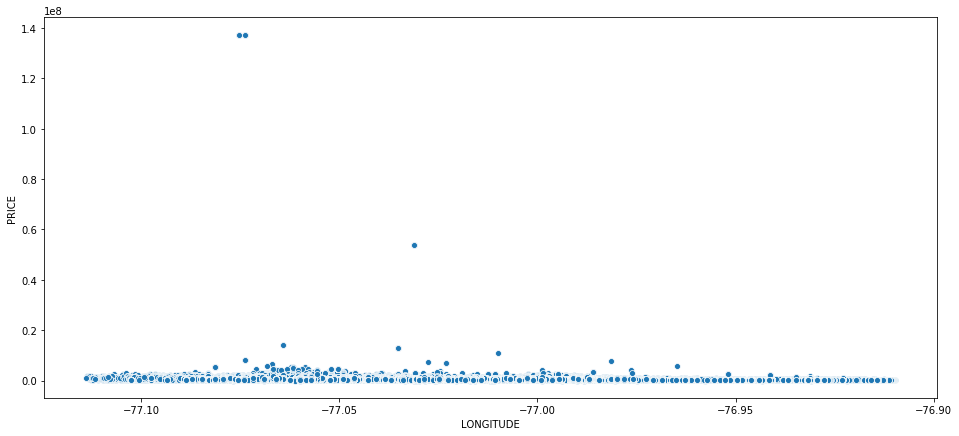

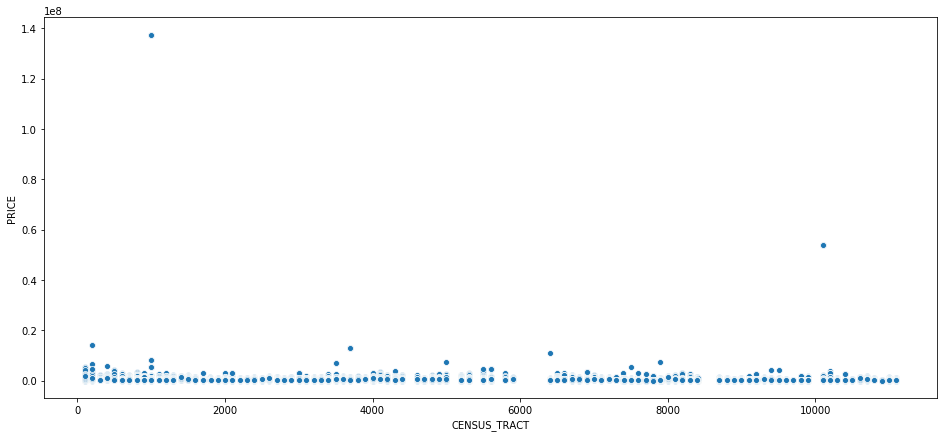

In [49]:
for i in housing_data_copy_price_notnull:
    if(housing_data_copy_price_notnull[i].dtype == "float64" or housing_data_copy_price_notnull[i].dtype == "int64"):
        plt.figure(figsize = (16,7))
        sns.scatterplot(x=housing_data_copy_price_notnull[i], y="PRICE", data= housing_data_copy_price_notnull)
        plt.show()

# Calculating pearson correlation among int/float variables

In [44]:
#housing_data_copy.AYB = housing_data_copy.AYB.apply(lambda x: x-2018)
#housing_data_copy.EYB = housing_data_copy.EYB.apply(lambda x: x-2018)
#housing_data_copy.SALEDATE = housing_data_copy.SALEDATE.apply(lambda x: x-2018)

In [125]:
housing_int = housing_data_copy.select_dtypes(include=['int64','float64'])

In [144]:
housing_int.PRICE.isnull().sum()

56321

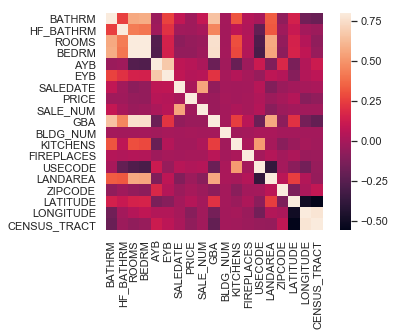

In [129]:

corrmat = housing_int.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [148]:
housing_data_copy.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'EYB',
       'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM',
       'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL',
       'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM',
       'SOURCE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD',
       'CENSUS_TRACT', 'WARD', 'SQUARE', 'QUADRANT'],
      dtype='object')

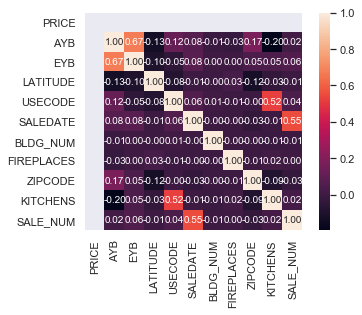

In [150]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(housing_int[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [85]:
# Highly correlated variables can be removed to avoid multi collinearity problem

# Remove AYB 
# Remove Latitude, longitude, census tract, bedrm, usecode, landarea

housing_data_copy_price_notnull = housing_data_copy_price_notnull.drop(["AYB","LATITUDE","LONGITUDE","CENSUS_TRACT","BEDRM","USECODE","LANDAREA"], axis = 1)


In [86]:
housing_data_copy_price_notnull = housing_data_copy_price_notnull.drop(["ZIPCODE"], axis = 1)


In [87]:
housing_data_copy_price_notnull.columns
#housing_data_copy.head()
#final columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'EYB', 'SALEDATE',
       'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT',
       'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS',
       'FIREPLACES', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'ASSESSMENT_NBHD', 'WARD',
       'SQUARE', 'QUADRANT'],
      dtype='object')

In [ ]:
g = sns.pairplot(train_test_data, vars=['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'SALEDATE',
       'PRICE', 'SALE_NUM', 'GBA', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA'])

In [ ]:
# Based on correlation and pairplot, let's create a list wich will be further used in model building

lst_1 = []

In [ ]:
#train_dataset = (train_dataset - train_dataset.mean()) / (train_dataset.max() - train_dataset.min())

# Label encoding for object data types

In [88]:

housing_object = housing_data_copy.select_dtypes(include=['O'])

print(housing_object.columns)
housing_object.head()


Index(['HEAT', 'AC', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'GIS_LAST_MOD_DTTM', 'SOURCE',
       'ASSESSMENT_NBHD', 'WARD', 'SQUARE', 'QUADRANT'],
      dtype='object')


,HEAT,AC,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,GIS_LAST_MOD_DTTM,SOURCE,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT
Index,,,,,,,,,,,,,,,,
9,Hot Water Rad,Y,U,2 Story,Row Inside,Good Quality,Average,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
16,Warm Cool,Y,Q,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
17,Hot Water Rad,N,U,2 Story,Row Inside,Above Average,Average,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,152,NW
22,Forced Air,Y,Q,2 Story,Semi-Detached,Above Average,Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,208,NW
23,Forced Air,Y,Q,2 Story,Semi-Detached,Above Average,Very Good,Common Brick,Built Up,Hardwood,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,208,NW


In [89]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()



In [93]:
#obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])
housing_data_copy_price_notnull['HEAT']=lb_make.fit_transform(housing_data_copy_price_notnull['HEAT'])
housing_data_copy_price_notnull['AC']= lb_make.fit_transform(housing_data_copy_price_notnull['AC'])
housing_data_copy_price_notnull['QUALIFIED']= lb_make.fit_transform(housing_data_copy_price_notnull['QUALIFIED'])
housing_data_copy_price_notnull['STYLE']= lb_make.fit_transform(housing_data_copy_price_notnull['STYLE'])
housing_data_copy_price_notnull['STRUCT']= lb_make.fit_transform(housing_data_copy_price_notnull['STRUCT'])
housing_data_copy_price_notnull['GRADE']= lb_make.fit_transform(housing_data_copy_price_notnull['GRADE'])
housing_data_copy_price_notnull['CNDTN']= lb_make.fit_transform(housing_data_copy_price_notnull['CNDTN'])
housing_data_copy_price_notnull['EXTWALL']= lb_make.fit_transform(housing_data_copy_price_notnull['EXTWALL'])
housing_data_copy_price_notnull['ROOF']= lb_make.fit_transform(housing_data_copy_price_notnull['ROOF'])
housing_data_copy_price_notnull['INTWALL']= lb_make.fit_transform(housing_data_copy_price_notnull['INTWALL'])
housing_data_copy_price_notnull['GIS_LAST_MOD_DTTM']= lb_make.fit_transform(housing_data_copy_price_notnull['GIS_LAST_MOD_DTTM'])
housing_data_copy_price_notnull['SOURCE']= lb_make.fit_transform(housing_data_copy_price_notnull['SOURCE'])
#housing_object['ASSESSMENT_NBHD']= lb_make.fit_transform(housing_object['ASSESSMENT_NBHD'])
#housing_object['WARD']= lb_make.fit_transform(housing_object['WARD'])
#housing_object['SQUARE']= lb_make.fit_transform(housing_object['SQUARE'])
#housing_data_copy_price_notnull['QUADRANT']= lb_make.fit_transform(housing_data_copy_price_notnull['QUADRANT'])
#housing_data_copy_price_notnull['WARD']= lb_make.fit_transform(housing_data_copy_price_notnull['WARD'])

In [94]:
housing_data_copy_price_notnull['ASSESSMENT_NBHD']= lb_make.fit_transform(housing_data_copy_price_notnull['ASSESSMENT_NBHD'])

In [95]:
#housing_data_copy['ASSESSMENT_NBHD']

In [96]:
housing_data_copy_price_notnull['WARD']= lb_make.fit_transform(housing_data_copy_price_notnull['WARD'])

In [97]:
# droping square n style for now as it has high cardinality

housing_data_copy_price_notnull = housing_data_copy_price_notnull.drop(["SQUARE","STYLE"], axis = 1)


In [98]:
housing_data_copy_price_notnull.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,EYB,SALEDATE,PRICE,QUALIFIED,SALE_NUM,...,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,GIS_LAST_MOD_DTTM,SOURCE,ASSESSMENT_NBHD,WARD,QUADRANT
Index,,,,,,,,,,,,,,,,,,,,,
16,3,1,12,1,8,1967,2010.0,1240000.0,0,1,...,1,2,1,1.0,0,1,1,42,1,NW
22,1,0,5,1,6,1967,2006.0,907400.0,0,1,...,1,0,1,1.0,0,1,1,42,1,NW
23,2,1,5,1,5,1984,2012.0,1065000.0,0,1,...,1,0,1,1.0,1,1,1,42,1,NW
24,2,1,7,1,8,1967,2012.0,1100000.0,0,1,...,1,0,1,1.0,2,1,1,42,1,NW
25,1,0,7,0,8,1967,1996.0,20000.0,1,1,...,1,0,4,1.0,0,1,1,42,1,NW


# Where the price is null, separating that data as testing data

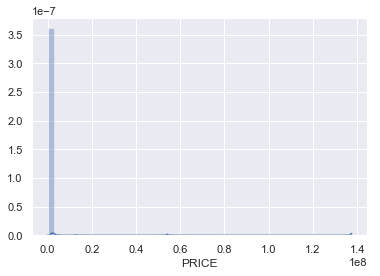

In [160]:
#Plotting price before log transformation
sns.distplot(housing_data_copy_price_notnull.PRICE)

In [99]:
#Converting price to normal distribution using log transformation
housing_data_copy_price_notnull["PRICE"] = np.log1p(housing_data_copy_price_notnull["PRICE"])

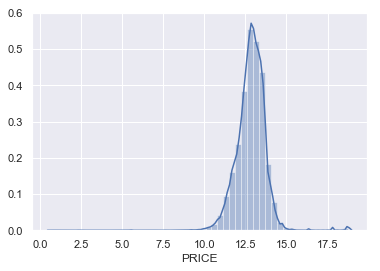

In [162]:
#ploting price after log transformation
sns.distplot(housing_data_copy_price_notnull.PRICE)

In [100]:
from sklearn.cross_validation import train_test_split

train,test = train_test_split(housing_data_copy_price_notnull, train_size=0.8 , random_state=100)

C:\Users\my\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [101]:
df1 = train.copy()
# First extract the target variable which is our House prices
Y = df1.PRICE.values
# Drop price from the house dataframe and create a matrix out of the house data
X = df1.drop(['PRICE'], axis=1)
#X = df1.as_matrix()
# Store the column/feature names into a list "colnames"
int_cols = [key for key in dict(X.dtypes) if dict(X.dtypes)[key] in ['float64', 'int64','uint8']]

In [102]:
X_train = train[int_cols]
y_train = train['PRICE']
X_test = test[int_cols]
y_test = test['PRICE']
print(int_cols)

['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'EYB', 'SALEDATE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'ASSESSMENT_NBHD', 'WARD']


# Linear regression 

In [103]:
import statsmodels.formula.api as sm

model = sm.OLS(y_train,X_train)
fit = model.fit()

print(fit.summary())

print(mean_squared_error(fit.predict(X_test), y_test))
print(np.round(r2_score(y_test, fit.predict(X_test))*100,2),'%')

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     2862.
Date:                Sat, 10 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:30:46   Log-Likelihood:                -63133.
No. Observations:               67102   AIC:                         1.263e+05
Df Residuals:                   67080   BIC:                         1.265e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
BATHRM                0.0962      0.00

NameError: name 'mean_squared_error' is not defined

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 25)
# Train the model on training data
pred = rf.fit(X_train,y_train).predict(X_test)


RMSE_1 = np.sqrt(mean_squared_error(y_test, pred))

print("The Root Mean Squared Error of Random Forest Regression is ",RMSE_1)

print("The R2 value of Random Forest Regression is ",r2_score(y_test,pred))

The Root Mean Squared Error of Random Forest Regression is  0.3054858993305518
The R2 value of Random Forest Regression is  0.8735927672808051


# Gradient boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

pred = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3,max_depth=1, random_state=0, loss='ls').fit(X_train,y_train).predict(X_test)

RMSE_1 = np.sqrt(mean_squared_error(y_test, pred))

print("The Root Mean Squared Error of Gradient Boosting Regression is ",RMSE_1)

print("The R2 value of Gradient Boosting Regression is ",r2_score(y_test,pred))

The Root Mean Squared Error of Gradient Boosting Regression is  0.5228223420592248
The R2 value of Gradient Boosting Regression is  0.6297476166067126


# Applying forward/backward Linear Regression and learning important features

In [ ]:
# 1 Manually selecting and deselecting variables

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.model_selection
import statsmodels.tools
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

In [83]:
# Check the VIF for each variable.
# Check for multicollinearity

#vif less than 10 are acceptable hence 

#VIF = 1 (Not correlated)
#1 < VIF < 10 (Moderately correlated)
#VIF >=10 (Highly correlated)

variables = model.model.exog

vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
#vif 



# Print Vif
counter = 1
for i in vif:
    print("VIF value for Variable",counter,":",i)
    counter += 1
del counter
print("---------------------------------------")
print("Mean VIF for all variables:",np.array(vif).mean())

VIF value for Variable 1 : 14.584289775668445
VIF value for Variable 2 : 2.455592857858385
VIF value for Variable 3 : 10.555059980033413
VIF value for Variable 4 : 32.87795858697111
VIF value for Variable 5 : 39.62875802784373
VIF value for Variable 6 : 25.243110375613117
VIF value for Variable 7 : 12039.362828616273
VIF value for Variable 8 : 19516.54443088443
VIF value for Variable 9 : 161205.44875167366
VIF value for Variable 10 : 1.3438457787652451
VIF value for Variable 11 : 4.461724706705011
VIF value for Variable 12 : 24.140076164651113
VIF value for Variable 13 : 8290.809494767716
VIF value for Variable 14 : 24.821618675936076
VIF value for Variable 15 : 22.110038658464077
VIF value for Variable 16 : 5.582636707416723
VIF value for Variable 17 : 5.302766352072884
VIF value for Variable 18 : 6.906883495492267
VIF value for Variable 19 : 5.286075963368922
VIF value for Variable 20 : 8.199479062269164
VIF value for Variable 21 : 45.9452841361049
VIF value for Variable 22 : 1.00653

In [84]:
lst = []

In [89]:
#This variables are selected based on vif and p values


lst = ['HF_BATHRM', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GRADE', 'EXTWALL', 'ROOF', 'INTWALL',
     'FIREPLACES', 'LANDAREA', 'ASSESSMENT_NBHD','CENSUS_TRACT', 'QUADRANT']

In [90]:
train_test_data_selected_variables = housing_data_copy_price_notnull[lst]

In [91]:
y2 =train_test_data_selected_variables.PRICE.copy()
x2 = train_test_data_selected_variables.drop(labels = "PRICE", axis = 1).copy()

X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size = .7, random_state = 99)

In [92]:
model = sm.OLS(y_train2,X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.032e+05
Date:                Fri, 09 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:04:08   Log-Likelihood:            -1.6119e+05
No. Observations:               65109   AIC:                         3.224e+05
Df Residuals:                   65097   BIC:                         3.225e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
HF_BATHRM           0.9950      0.022     46.025      0.000       0.953       1.037
QUALIFIED           0.7841      0.027     28.959      0.000       0.731       0.837
SALE_NUM            0.7561      0.008     98.898      0.000       0.741       0.771
GRADE               0.5758      0.009     66.812      0.000       0.559       0.593
EXTWALL             0.8614      0.010     86.623      0.000       0.842       0.881
ROOF               -0.2313      0.009    -25.087      0.000      -0.249      -0.213
INTWALL             0.8760      0.015     58.241      0.000       0.847       0.905
FIREPLACES          0.2997      0.011     26.339      0.000       0.277       0.322
LANDAREA            0.0005   7.05e-06     69.256      0.000       0.000       0.001
ASSESSMENT_NBHD     0.0732      0.001    106.557      0.000       0.072       0.075
CENSUS_TRACT        0.0003   3.49e-06     82.484      0.000       0.000       0.000
QUADRANT            1.2312      0.015     80.958      0.000       1.201       1.261
==============================================================================
Omnibus:                     7608.600   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31029.642
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       6.210   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# Auto selection of variables


import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [100]:
model = forward_selected(train_test_data_selected_variables,"PRICE")


In [101]:
model.summary()

# Linear model results in poor prediction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     2222.
Date:                Fri, 09 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:10:55   Log-Likelihood:            -1.0701e+05
No. Observations:               93013   AIC:                         2.140e+05
Df Residuals:                   93000   BIC:                         2.142e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.7178      0.011   1113.077      0.000      12.695      12.740
CENSUS_TRACT    -5.541e-05   8.31e-07    -66.658      0.000    -5.7e-05   -5.38e-05
SALE_NUM            0.1403      0.002     78.108      0.000       0.137       0.144
HF_BATHRM           0.2976      0.005     61.591      0.000       0.288       0.307
GRADE               0.1030      0.002     52.674      0.000       0.099       0.107
QUALIFIED          -0.1942      0.006    -31.897      0.000      -0.206      -0.182
QUADRANT           -0.0693      0.004    -19.380      0.000      -0.076      -0.062
INTWALL            -0.0321      0.003     -9.323      0.000      -0.039      -0.025
FIREPLACES          0.0019      0.000      5.363      0.000       0.001       0.003
LANDAREA         7.391e-06    1.6e-06      4.608      0.000    4.25e-06    1.05e-05
EXTWALL            -0.0108      0.002     -4.643      0.000      -0.015      -0.006
ASSESSMENT_NBHD    -0.0004      0.000     -2.157      0.031      -0.001   -3.29e-05
ROOF                0.0022      0.002      1.067      0.286      -0.002       0.006
==============================================================================
Omnibus:                    34836.968   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1411874.377
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                      21.958   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# KNN

In [103]:
from sklearn import neighbors


knn = neighbors.KNeighborsRegressor(5)

pred_test = knn.fit(X_train,y_train).predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, pred_test))

print("The Root Mean Squared Error of KNN Regression is ",RMSE)

print("The R2 value of KNN Regression is ",r2_score(y_test,pred_test))

The Root Mean Squared Error of KNN Regression is  0.5856313957883937
The R2 value of KNN Regression is  0.5354437697279417


# Lasso

In [113]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

model = Lasso()

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train, y_train)

print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [114]:
print("Best Grid Score:",grid.best_score_)
print("Best Grid Alpha parameter:",grid.best_estimator_.alpha)

Best Grid Score: 0.46116608177825147
Best Grid Alpha parameter: 0.0


In [115]:
Y = grid.predict(X_test)

print("mean squared error for lasso with grid parameter tuning is",mean_squared_error(Y, y_test))

print("R square for lasso with grid parameter tuning is : ",r2_score(y_test, Y, sample_weight=None))

mean squared error for lasso with grid parameter tuning is 0.580515664096758
R square for lasso with grid parameter tuning is :  0.21367238269519429


In [116]:
#Random Search Parameter Tuning

# prepare a uniform distribution to sample for the alpha parameter

param_grid = {'alpha': sp_rand()}

model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000003EDEDDA0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)


In [117]:
#Optimum alpha from random search

print("The Optimum Aplha values",rsearch.best_params_)

The Optimum Aplha values {'alpha': 0.01154789938628753}


In [118]:
# summarize the results of the random parameter search

print("Best Score:",rsearch.best_score_)
print("Best Aplha Value:",rsearch.best_estimator_.alpha)

Best Score: 0.45317720021551483
Best Aplha Value: 0.01154789938628753


In [119]:
Y = grid.predict(X_test)
from sklearn.metrics import mean_squared_error
print("mean squared error for lasso with random parameter tuning is",mean_squared_error(Y, y_test))
import sklearn
print("R square for lasso with random parameter tuning is : ",sklearn.metrics.r2_score(y_test, Y, sample_weight=None))

mean squared error for lasso with random parameter tuning is 0.580515664096758
R square for lasso with random parameter tuning is :  0.21367238269519429


In [120]:
print("Mean Squeared Eroor for best prediction:",mean_squared_error(y_test,Y))
print("Mean Absolute Error for best prediction:",mean_absolute_error(y_test,Y))
print("Median Squared Error for best prediction:",median_absolute_error(y_test,Y))
print("R2 score for best prediction:",r2_score(y_test,Y))

Mean Squeared Eroor for best prediction: 0.580515664096758
Mean Absolute Error for best prediction: 0.5689894427887076
Median Squared Error for best prediction: 0.5175347560338626
R2 score for best prediction: 0.21367238269519429


# Model Comparison

In [109]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)

lr: 0.461166 (0.014995)
ridge: 0.461165 (0.015018)
lasso: 0.362314 (0.012682)
KNN: 0.638220 (0.002276)
decisiontree: 0.788026 (0.000739)
randomforest: 0.780824 (0.001868)
gradientboosting: 0.665479 (0.004940)


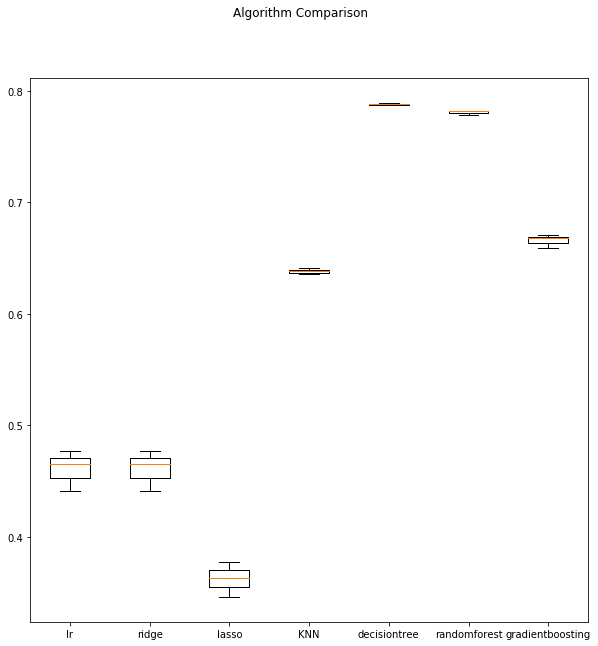

In [112]:
#Different model comparison with X_train and y_train

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingRegressor
# prepare models
models = []
models.append(('lr', LinearRegression()))
models.append(('ridge', Ridge()))
models.append(('lasso', Lasso()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('decisiontree', DecisionTreeClassifier()))
models.append(('randomforest', RandomForestRegressor()))
models.append(('gradientboosting', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()